# Model Selection
In this notebook I run a big number of models over several sets of data (mixing bitcoin price and volume, gold price and Nasdaq valuation) and using several transformers for the data in order to try to select the best possible model for trying to beat the market.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MaxAbsScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import numbers
import datetime
from sklearn import model_selection

In [4]:
# Loading data from bitcoin, gold and nasdaq
data_for_use = pd.read_csv('./data_proc/bitcoin_data_for_use.csv', index_col=0)
data_gold = pd.read_csv('./data_proc/gold_data_for_use.csv', index_col=0)
data_nasdaq = pd.read_csv('./data_proc/nasdaq_data_for_use.csv', index_col=0)

#Trial after trial I've seen that the columns "day" and "outlier" add no forecasting capacity, so I discard them

#This is the bitcoin closing price and volume
data_for_use_w_vol= data_for_use.drop(labels=['dia', 'outlier'], axis=1)
#This is bitcoin price and volume and gold price
data_for_use_w_gold = data_for_use_w_vol.merge(data_gold, left_index=True, right_index=True)
#This is bitcoin price and volume and Nasdaq valuation
data_for_use_w_nasdaq = data_for_use_w_vol.merge(data_nasdaq, left_index=True, right_index=True)
#This is bitcoin price and volume, gold price and Nasdaq valuation
data_for_use_w_all = data_for_use_w_gold.merge(data_nasdaq, left_index=True, right_index=True)

#This is the bitcoin closing price (excluding volume data)
data_for_use_basic = data_for_use.drop(labels=['dia',
                    'varV0','varV1','varV2','varV3','varV4','varV5','varV6','varV7','varV8','varV9',
                    'varV10','varV11','varV12','varV13','varV14','varV15','varV16','varV17','varV18','varV19',
                    'varV20','varV21','varV22','varV23','varV24','varV25','varV26','varV27','varV28','varV29', 'outlier'
                    ], axis=1)

#This is bitcoin price and gold price
data_for_use_basic_w_gold = data_for_use_basic.merge(data_gold, left_index=True, right_index=True)
#This is bitcoin price and Nasdaq valuation
data_for_use_basic_w_nasdaq = data_for_use_basic.merge(data_nasdaq, left_index=True, right_index=True)
#This is bitcoin price, gold price and Nasdaq valuation
data_for_use_basic_w_all = data_for_use_basic_w_gold.merge(data_nasdaq, left_index=True, right_index=True)
#This includes only bitcoin price variations for the last 30 days
data_for_use_bone_deep = data_for_use_basic.drop(labels=['varPm93',
                    'varPm123','varPm153','varPm183','varPm213','varPm243','varPm273','varPm303','varPm333',
                    'varPs30','varPs37','varPs44','varPs51','varPs58','varPs65','varPs72','varPs79','varPs86'
                    ], axis=1)

#Putting all the datasets in the same place so I can later loop through them
data = []
data.append(['data_for_use_w_vol', data_for_use_w_vol])
data.append(['data_for_use_w_gold', data_for_use_w_gold])
data.append(['data_for_use_w_nasdaq', data_for_use_w_nasdaq])
data.append(['data_for_use_w_all', data_for_use_w_all])
data.append(['data_for_use_basic', data_for_use_basic])
data.append(['data_for_use_basic_w_gold', data_for_use_basic_w_gold])
data.append(['data_for_use_basic_w_nasdaq', data_for_use_basic_w_nasdaq])
data.append(['data_for_use_basic_w_all', data_for_use_basic_w_all])
data.append(['data_for_use_bone_deep', data_for_use_bone_deep])

In [5]:
#Putting all the models in the same place so I can later loop through them
modelos=[]

#LogisticRegression and SVC models have never offered a good prediction during trials.
#In order to save time, I don't execute them
#I'm also reducing the executions of KNeighborsClassifier to 20 neighbors because in trials there's never been
#good results from 20 to 30
#I reduce the max depth to 20 in DecisionTreeClassifier because with any number higher than tha the model overfits

#modelos.append(['LogisticRegression_none_newton-cg', LogisticRegression(penalty='none', solver='newton-cg', random_state=0)])
#modelos.append(['LogisticRegression_none_lbfgs', LogisticRegression(penalty='none', solver='lbfgs', random_state=0)])
#modelos.append(['LogisticRegression_none_sag', LogisticRegression(penalty='none', solver='sag', random_state=0)])
#modelos.append(['LogisticRegression_none_saga', LogisticRegression(penalty='none', solver='saga', random_state=0)])
#modelos.append(['LogisticRegression_l2_newton-cg', LogisticRegression(penalty='l2', solver='newton-cg', random_state=0)])
#modelos.append(['LogisticRegression_l2_lbfgs', LogisticRegression(penalty='l2', solver='lbfgs', random_state=0)])
#modelos.append(['LogisticRegression_l2_liblinear', LogisticRegression(penalty='l2', solver='liblinear', random_state=0)])
#modelos.append(['LogisticRegression_l2_sag', LogisticRegression(penalty='l2', solver='sag', random_state=0)])
#modelos.append(['LogisticRegression_l2_saga', LogisticRegression(penalty='l2', solver='saga', random_state=0)])
#modelos.append(['LogisticRegression_l1_liblinear', LogisticRegression(penalty='l1', solver='liblinear', random_state=0)])
#modelos.append(['LogisticRegression_l1_saga', LogisticRegression(penalty='l1', solver='saga', random_state=0)])
#modelos.append(['LogisticRegression_elasticnet_saga', LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', random_state=0)])
for vecinos in range(1,21):
    modelos.append(['KNeighbors_'+str(vecinos), KNeighborsClassifier(n_neighbors=vecinos)])
#for grado in range(1,4):
#    modelos.append(['SVC_'+str(grado), SVC(probability=True, kernel='poly', degree=grado, random_state=0)])
for profund in range(1,21):
    modelos.append(['DecisionTree_'+str(profund), DecisionTreeClassifier(max_depth=profund, random_state=0)])
for estimadores in range(1,21):
    modelos.append(['AdaBoost_'+str(estimadores), AdaBoostClassifier(n_estimators=estimadores, random_state=0)])
for min_muestras in range(2,21):
    modelos.append(['RandomForest_'+str(min_muestras), RandomForestClassifier(min_samples_split=min_muestras, random_state=0)])

In [6]:
# My walk forward validation function receives the following parameters:
# model: the actual model that is going to be used to make predictions
# X_train_wfv: training data, without the target variable
# y_train_wfv: target variable for training data (True if the price went up the following day)
# X_test_wfv: test data, without the target variable
# y_test_wfv: target variable for test data (True if the price went up the following day)
# real_test_wfv: the actual price variation for the following day for test data (used to calculate returns)
# ct_wfv: the transformer that it's going to be used on the data
def walk_forward_validation (model, X_train_wfv, y_train_wfv, X_test_wfv, y_test_wfv, real_test_wfv, ct_wfv):
    y_pred_wfv = list()
    #variable that indicates if we are invested in bitcoin or not following the model predictions
    dentro=True
    resultado_naive=1
    resultado_mod=1
    resultado_mod_comis=1
    
    #We apply a 0.15% transaction fee
    fee=0.0015
    
    
    for i in range(len(y_test_wfv)):
        X_train_wfv_ct=ct_wfv.fit_transform(X_train_wfv)
        model.fit(X_train_wfv_ct, y_train_wfv)
        X_test_wfv_ct=ct_wfv.transform(X_test_wfv)
        
        #We predict if the price will go up the next day and we add it to the predictions list
        y_pred_next = model.predict(X_test_wfv_ct[i:i+1])
        y_pred_wfv.append(y_pred_next[0])
        
        #We append the test data for the following day to the training data,
        #so it can be used to train the model in the next iteration of the loop
        X_train_wfv=X_train_wfv.append(X_test_wfv[i:i+1])
        y_train_wfv=y_train_wfv.append(pd.Series(y_test_wfv[i]))
        
        
        #If we change our invested situation (buy or sell), we apply the transaction fee
        if y_pred_next[0]!=dentro:
            resultado_mod_comis=resultado_mod_comis*(1-fee)
        #We set the invested situation according to the model's prediction
        dentro=y_pred_next[0]
        
        #Naive model is always invested
        resultado_naive=resultado_naive*(1+real_test_wfv[i])
        #If we are invested, we apply the price variation for the following day
        if dentro:
            resultado_mod=resultado_mod*(1+real_test_wfv[i])
            resultado_mod_comis=resultado_mod_comis*(1+real_test_wfv[i])
    
    #The function returns the confusion matrix, f1_score, accuracy and the returns for the naive model
    #and the model used, without applying the fees and applying them
    return metrics.confusion_matrix(y_test_wfv, y_pred_wfv), metrics.f1_score(y_test_wfv,y_pred_wfv), \
        metrics.accuracy_score(y_test_wfv,y_pred_wfv), resultado_naive, resultado_mod, resultado_mod_comis

# BIG WARNING: the following cell takes 96 hours to run in my machine
If you don't want to wait that long, jump to reading the results from the csv

In [18]:
# In this cell I loop though all the datasets, models and scalers and store the results for every execution
resultados=[]

#dataset loop
for d in data:
    data_wfv = d[1]
    
    #I split the data into test and the rest (test data is not meant to be used here, this cell is only for CV)
    data_no_test, data_test = train_test_split(data_wfv, shuffle=False, test_size=0.2)

    #I split the rest of the data into train and cross-validation (cv).
    #cv is the data used as "test" in this program, I only want to discover the best combinations of
    #data-transformer-model-parameters
    data_train, data_cv = train_test_split(data_no_test, shuffle=False, test_size=0.2)
    
    #I separate the variable I want to predict (if bitcoin price will go up or down the following day)
    X_train=data_train.drop(labels=['subida', 'varPSig'], axis=1)
    y_train=data_train['subida']
    real_train=data_train['varPSig']

    X_test=data_cv.drop(labels=['subida', 'varPSig'], axis=1)
    y_test=data_cv['subida']
    real_test=data_cv['varPSig']
    
    #creating scalers (the columns depend on the dataset, that's why we create them here)
    number_columns = X_train.select_dtypes('number').columns

    tSS=[
        ('scaler', StandardScaler(),number_columns)
        ]
    tMM=[
        ('scaler', MinMaxScaler(),number_columns)
        ]
    tPTyj=[
        ('scaler', PowerTransformer(method='yeo-johnson', standardize=False),number_columns)
        ]
    tQT=[
        ('scaler', QuantileTransformer(output_distribution='normal', random_state=0),number_columns)
        ]
    tMA=[
        ('scaler', MaxAbsScaler(),number_columns)
        ]
    
    #Column transformers list
    ct_list=[]
    ct_list.append(['StandardScaler', ColumnTransformer(transformers=tSS, remainder='passthrough')])
    ct_list.append(['MinMaxScaler', ColumnTransformer(transformers=tMM, remainder='passthrough')])
    ct_list.append(['PowerTransformer_yeo-johnson', ColumnTransformer(transformers=tPTyj, remainder='passthrough')])
    ct_list.append(['QuantileTransformer', ColumnTransformer(transformers=tQT, remainder='passthrough')])
    ct_list.append(['MaxAbsScaler', ColumnTransformer(transformers=tMA, remainder='passthrough')])
    
    #scalers loop
    for c in ct_list:
        #model loop
        for m in modelos:
            print(d[0] + ' ' + c[0] + ' ' + m[0] + ' ' + str(len(y_test)) + ' ' + str(datetime.datetime.now()))
            conf_mat, f1, acc, res_naive, res_mod, res_comis = \
                walk_forward_validation (m[1], X_train, y_train, X_test, y_test, real_test, c[1])
            resultados.append([d[0], c[0], m[0], conf_mat, f1, acc, res_naive, res_mod, res_comis])
            print(resultados[-1])

data_for_use_w_vol StandardScaler KNeighbors_1 336 2022-01-12 00:00:20.711453
['data_for_use_w_vol', 'StandardScaler', 'KNeighbors_1', array([[ 72, 101],
       [ 61, 102]]), 0.5573770491803279, 0.5178571428571429, 1.086943915437065, 1.3287707409688183, 1.052933112629567]
data_for_use_w_vol StandardScaler KNeighbors_2 336 2022-01-12 00:00:24.895216
['data_for_use_w_vol', 'StandardScaler', 'KNeighbors_2', array([[113,  60],
       [104,  59]]), 0.41843971631205673, 0.5119047619047619, 1.086943915437065, 1.0942556730049209, 0.8855163105363277]
data_for_use_w_vol StandardScaler KNeighbors_3 336 2022-01-12 00:00:28.873633
['data_for_use_w_vol', 'StandardScaler', 'KNeighbors_3', array([[ 59, 114],
       [ 54, 109]]), 0.5647668393782385, 0.5, 1.086943915437065, 1.301205765569607, 1.0310903112705547]
data_for_use_w_vol StandardScaler KNeighbors_4 336 2022-01-12 00:00:32.829533
['data_for_use_w_vol', 'StandardScaler', 'KNeighbors_4', array([[82, 91],
       [76, 87]]), 0.5102639296187683, 0.5

['data_for_use_w_vol', 'StandardScaler', 'DecisionTree_11', array([[ 59, 114],
       [ 48, 115]]), 0.5867346938775511, 0.5178571428571429, 1.086943915437065, 1.191404367788142, 0.978715021508478]
data_for_use_w_vol StandardScaler DecisionTree_12 336 2022-01-12 00:04:41.246458
['data_for_use_w_vol', 'StandardScaler', 'DecisionTree_12', array([[ 65, 108],
       [ 55, 108]]), 0.5699208443271767, 0.5148809523809523, 1.086943915437065, 0.7974099540485737, 0.6337766597462514]
data_for_use_w_vol StandardScaler DecisionTree_13 336 2022-01-12 00:05:08.272965
['data_for_use_w_vol', 'StandardScaler', 'DecisionTree_13', array([[ 63, 110],
       [ 60, 103]]), 0.5478723404255319, 0.49404761904761907, 1.086943915437065, 0.7794161477540594, 0.6157667929945582]
data_for_use_w_vol StandardScaler DecisionTree_14 336 2022-01-12 00:05:36.234058
['data_for_use_w_vol', 'StandardScaler', 'DecisionTree_14', array([[ 65, 108],
       [ 52, 111]]), 0.581151832460733, 0.5238095238095238, 1.086943915437065, 1.1

['data_for_use_w_vol', 'StandardScaler', 'RandomForest_3', array([[ 33, 140],
       [ 38, 125]]), 0.5841121495327103, 0.47023809523809523, 1.086943915437065, 0.7748349242934891, 0.6608524789624856]
data_for_use_w_vol StandardScaler RandomForest_4 336 2022-01-12 00:27:27.438164
['data_for_use_w_vol', 'StandardScaler', 'RandomForest_4', array([[ 36, 137],
       [ 42, 121]]), 0.5748218527315915, 0.46726190476190477, 1.086943915437065, 0.7262059657570823, 0.6156691961747758]
data_for_use_w_vol StandardScaler RandomForest_5 336 2022-01-12 00:30:46.513237
['data_for_use_w_vol', 'StandardScaler', 'RandomForest_5', array([[ 29, 144],
       [ 34, 129]]), 0.591743119266055, 0.47023809523809523, 1.086943915437065, 0.6915737570132802, 0.598760508704072]
data_for_use_w_vol StandardScaler RandomForest_6 336 2022-01-12 00:34:01.511523
['data_for_use_w_vol', 'StandardScaler', 'RandomForest_6', array([[ 24, 149],
       [ 39, 124]]), 0.5688073394495413, 0.44047619047619047, 1.086943915437065, 0.7232

['data_for_use_w_vol', 'MinMaxScaler', 'KNeighbors_13', array([[ 40, 133],
       [ 36, 127]]), 0.6004728132387707, 0.49702380952380953, 1.086943915437065, 1.1854021936540746, 1.0418367634184458]
data_for_use_w_vol MinMaxScaler KNeighbors_14 336 2022-01-12 01:23:25.646015
['data_for_use_w_vol', 'MinMaxScaler', 'KNeighbors_14', array([[ 51, 122],
       [ 49, 114]]), 0.5714285714285714, 0.49107142857142855, 1.086943915437065, 1.171764536410813, 0.9859804609566709]
data_for_use_w_vol MinMaxScaler KNeighbors_15 336 2022-01-12 01:23:29.254551
['data_for_use_w_vol', 'MinMaxScaler', 'KNeighbors_15', array([[ 35, 138],
       [ 30, 133]]), 0.6129032258064516, 0.5, 1.086943915437065, 1.470756068573889, 1.3200841965629542]
data_for_use_w_vol MinMaxScaler KNeighbors_16 336 2022-01-12 01:23:32.872948
['data_for_use_w_vol', 'MinMaxScaler', 'KNeighbors_16', array([[ 50, 123],
       [ 46, 117]]), 0.5806451612903225, 0.49702380952380953, 1.086943915437065, 1.1028989471021116, 0.940656493900465]
data

['data_for_use_w_vol', 'MinMaxScaler', 'AdaBoost_4', array([[ 17, 156],
       [ 18, 145]]), 0.625, 0.48214285714285715, 1.086943915437065, 0.9272583572722775, 0.8666901694869803]
data_for_use_w_vol MinMaxScaler AdaBoost_5 336 2022-01-12 01:32:04.953119
['data_for_use_w_vol', 'MinMaxScaler', 'AdaBoost_5', array([[ 34, 139],
       [ 36, 127]]), 0.5920745920745921, 0.4791666666666667, 1.086943915437065, 0.7147912782864929, 0.6235245283406577]
data_for_use_w_vol MinMaxScaler AdaBoost_6 336 2022-01-12 01:32:22.505504
['data_for_use_w_vol', 'MinMaxScaler', 'AdaBoost_6', array([[ 41, 132],
       [ 35, 128]]), 0.6052009456264776, 0.5029761904761905, 1.086943915437065, 0.7439253122755661, 0.6528469160929506]
data_for_use_w_vol MinMaxScaler AdaBoost_7 336 2022-01-12 01:32:43.041233
['data_for_use_w_vol', 'MinMaxScaler', 'AdaBoost_7', array([[ 49, 124],
       [ 45, 118]]), 0.5827160493827162, 0.49702380952380953, 1.086943915437065, 0.6932167383448414, 0.6028919385566965]
data_for_use_w_vol Mi

['data_for_use_w_vol', 'MinMaxScaler', 'RandomForest_16', array([[ 32, 141],
       [ 33, 130]]), 0.5990783410138248, 0.48214285714285715, 1.086943915437065, 0.812694483683396, 0.6931426905815132]
data_for_use_w_vol MinMaxScaler RandomForest_17 336 2022-01-12 02:33:17.406736
['data_for_use_w_vol', 'MinMaxScaler', 'RandomForest_17', array([[ 28, 145],
       [ 36, 127]]), 0.5839080459770115, 0.46130952380952384, 1.086943915437065, 0.7176809730718919, 0.6364685799586917]
data_for_use_w_vol MinMaxScaler RandomForest_18 336 2022-01-12 02:36:31.989233
['data_for_use_w_vol', 'MinMaxScaler', 'RandomForest_18', array([[ 31, 142],
       [ 32, 131]]), 0.6009174311926606, 0.48214285714285715, 1.086943915437065, 1.0396112905494463, 0.9027957228782416]
data_for_use_w_vol MinMaxScaler RandomForest_19 336 2022-01-12 02:39:45.881908
['data_for_use_w_vol', 'MinMaxScaler', 'RandomForest_19', array([[ 28, 145],
       [ 33, 130]]), 0.593607305936073, 0.47023809523809523, 1.086943915437065, 0.76439974783

['data_for_use_w_vol', 'PowerTransformer_yeo-johnson', 'DecisionTree_4', array([[ 25, 148],
       [ 33, 130]]), 0.5895691609977324, 0.46130952380952384, 1.086943915437065, 0.9853990410558827, 0.8738918152852703]
data_for_use_w_vol PowerTransformer_yeo-johnson DecisionTree_5 336 2022-01-12 03:11:15.970463
['data_for_use_w_vol', 'PowerTransformer_yeo-johnson', 'DecisionTree_5', array([[ 35, 138],
       [ 47, 116]]), 0.5563549160671463, 0.4494047619047619, 1.086943915437065, 0.7513101742010873, 0.6302942820196791]
data_for_use_w_vol PowerTransformer_yeo-johnson DecisionTree_6 336 2022-01-12 03:12:28.856711
['data_for_use_w_vol', 'PowerTransformer_yeo-johnson', 'DecisionTree_6', array([[ 41, 132],
       [ 39, 124]]), 0.5918854415274463, 0.49107142857142855, 1.086943915437065, 1.1675192686421547, 0.9912965629658173]
data_for_use_w_vol PowerTransformer_yeo-johnson DecisionTree_7 336 2022-01-12 03:13:43.506694
['data_for_use_w_vol', 'PowerTransformer_yeo-johnson', 'DecisionTree_7', array([

['data_for_use_w_vol', 'PowerTransformer_yeo-johnson', 'AdaBoost_12', array([[ 47, 126],
       [ 43, 120]]), 0.5867970660146699, 0.49702380952380953, 1.086943915437065, 1.01422827973755, 0.9035184903212964]
data_for_use_w_vol PowerTransformer_yeo-johnson AdaBoost_13 336 2022-01-12 03:49:48.484512
['data_for_use_w_vol', 'PowerTransformer_yeo-johnson', 'AdaBoost_13', array([[ 49, 124],
       [ 43, 120]]), 0.5896805896805897, 0.5029761904761905, 1.086943915437065, 1.0959687733666812, 0.9778031679866553]
data_for_use_w_vol PowerTransformer_yeo-johnson AdaBoost_14 336 2022-01-12 03:51:28.505228
['data_for_use_w_vol', 'PowerTransformer_yeo-johnson', 'AdaBoost_14', array([[ 49, 124],
       [ 45, 118]]), 0.5827160493827162, 0.49702380952380953, 1.086943915437065, 0.9457242334231833, 0.8336856592518299]
data_for_use_w_vol PowerTransformer_yeo-johnson AdaBoost_15 336 2022-01-12 03:53:11.791095
['data_for_use_w_vol', 'PowerTransformer_yeo-johnson', 'AdaBoost_15', array([[ 48, 125],
       [ 46

['data_for_use_w_vol', 'PowerTransformer_yeo-johnson', 'RandomForest_20', array([[ 27, 146],
       [ 31, 132]]), 0.5986394557823129, 0.4732142857142857, 1.086943915437065, 0.8505313933374784, 0.7520245580712771]
data_for_use_w_vol QuantileTransformer KNeighbors_1 336 2022-01-12 05:25:03.576667
['data_for_use_w_vol', 'QuantileTransformer', 'KNeighbors_1', array([[ 69, 104],
       [ 66,  97]]), 0.532967032967033, 0.49404761904761907, 1.086943915437065, 1.202442410033587, 0.9442857320852018]
data_for_use_w_vol QuantileTransformer KNeighbors_2 336 2022-01-12 05:26:05.287554
['data_for_use_w_vol', 'QuantileTransformer', 'KNeighbors_2', array([[111,  62],
       [115,  48]]), 0.3516483516483517, 0.4732142857142857, 1.086943915437065, 0.8554819050908586, 0.6840268348073661]
data_for_use_w_vol QuantileTransformer KNeighbors_3 336 2022-01-12 05:27:07.251545
['data_for_use_w_vol', 'QuantileTransformer', 'KNeighbors_3', array([[ 61, 112],
       [ 66,  97]]), 0.521505376344086, 0.47023809523809

['data_for_use_w_vol', 'QuantileTransformer', 'DecisionTree_9', array([[ 57, 116],
       [ 47, 116]]), 0.5873417721518988, 0.5148809523809523, 1.086943915437065, 1.241544608130136, 1.013798562485538]
data_for_use_w_vol QuantileTransformer DecisionTree_10 336 2022-01-12 05:56:30.053905
['data_for_use_w_vol', 'QuantileTransformer', 'DecisionTree_10', array([[ 55, 118],
       [ 45, 118]]), 0.5914786967418546, 0.5148809523809523, 1.086943915437065, 1.1372040715218799, 0.9202719059025771]
data_for_use_w_vol QuantileTransformer DecisionTree_11 336 2022-01-12 05:57:52.031729
['data_for_use_w_vol', 'QuantileTransformer', 'DecisionTree_11', array([[ 59, 114],
       [ 48, 115]]), 0.5867346938775511, 0.5178571428571429, 1.086943915437065, 1.191404367788142, 0.978715021508478]
data_for_use_w_vol QuantileTransformer DecisionTree_12 336 2022-01-12 05:59:15.034763
['data_for_use_w_vol', 'QuantileTransformer', 'DecisionTree_12', array([[ 65, 108],
       [ 55, 108]]), 0.5699208443271767, 0.51488095

['data_for_use_w_vol', 'QuantileTransformer', 'AdaBoost_18', array([[ 53, 120],
       [ 53, 110]]), 0.5597964376590331, 0.4851190476190476, 1.086943915437065, 0.8175680651829709, 0.7099739673074661]
data_for_use_w_vol QuantileTransformer AdaBoost_19 336 2022-01-12 06:39:03.982607
['data_for_use_w_vol', 'QuantileTransformer', 'AdaBoost_19', array([[ 52, 121],
       [ 50, 113]]), 0.5692695214105793, 0.49107142857142855, 1.086943915437065, 0.793292249717983, 0.6888929127148506]
data_for_use_w_vol QuantileTransformer AdaBoost_20 336 2022-01-12 06:41:01.772067
['data_for_use_w_vol', 'QuantileTransformer', 'AdaBoost_20', array([[ 53, 120],
       [ 48, 115]]), 0.577889447236181, 0.5, 1.086943915437065, 0.8563790039132803, 0.7459133466237219]
data_for_use_w_vol QuantileTransformer RandomForest_2 336 2022-01-12 06:43:03.129062
['data_for_use_w_vol', 'QuantileTransformer', 'RandomForest_2', array([[ 28, 145],
       [ 36, 127]]), 0.5839080459770115, 0.46130952380952384, 1.086943915437065, 1.0

['data_for_use_w_vol', 'MaxAbsScaler', 'KNeighbors_8', array([[ 56, 117],
       [ 61, 102]]), 0.5340314136125655, 0.47023809523809523, 1.086943915437065, 0.876934084368135, 0.7001278143134091]
data_for_use_w_vol MaxAbsScaler KNeighbors_9 336 2022-01-12 08:33:43.846046
['data_for_use_w_vol', 'MaxAbsScaler', 'KNeighbors_9', array([[ 34, 139],
       [ 35, 128]]), 0.5953488372093023, 0.48214285714285715, 1.086943915437065, 0.9703247433880783, 0.8275846789577128]
data_for_use_w_vol MaxAbsScaler KNeighbors_10 336 2022-01-12 08:33:47.570026
['data_for_use_w_vol', 'MaxAbsScaler', 'KNeighbors_10', array([[ 46, 127],
       [ 46, 117]]), 0.5749385749385749, 0.4851190476190476, 1.086943915437065, 1.1629758480754864, 0.9625591256060544]
data_for_use_w_vol MaxAbsScaler KNeighbors_11 336 2022-01-12 08:33:51.587038
['data_for_use_w_vol', 'MaxAbsScaler', 'KNeighbors_11', array([[ 31, 142],
       [ 27, 136]]), 0.616780045351474, 0.49702380952380953, 1.086943915437065, 1.2599839110365851, 1.100756422

['data_for_use_w_vol', 'MaxAbsScaler', 'DecisionTree_19', array([[ 72, 101],
       [ 52, 111]]), 0.592, 0.5446428571428571, 1.086943915437065, 1.0603531484781858, 0.8314530710273473]
data_for_use_w_vol MaxAbsScaler DecisionTree_20 336 2022-01-12 08:41:04.898230
['data_for_use_w_vol', 'MaxAbsScaler', 'DecisionTree_20', array([[ 69, 104],
       [ 53, 110]]), 0.5835543766578248, 0.5327380952380952, 1.086943915437065, 0.8640050140727503, 0.6815711475603814]
data_for_use_w_vol MaxAbsScaler AdaBoost_1 336 2022-01-12 08:41:33.842569
['data_for_use_w_vol', 'MaxAbsScaler', 'AdaBoost_1', array([[  4, 169],
       [  6, 157]]), 0.6421267893660532, 0.4791666666666667, 1.086943915437065, 1.068177651295749, 1.052262708035124]
data_for_use_w_vol MaxAbsScaler AdaBoost_2 336 2022-01-12 08:41:39.130171
['data_for_use_w_vol', 'MaxAbsScaler', 'AdaBoost_2', array([[  7, 166],
       [ 10, 153]]), 0.6348547717842323, 0.47619047619047616, 1.086943915437065, 1.0713460863867612, 1.0334356721193374]
data_for_

['data_for_use_w_vol', 'MaxAbsScaler', 'RandomForest_11', array([[ 33, 140],
       [ 33, 130]]), 0.6004618937644342, 0.4851190476190476, 1.086943915437065, 0.8532918534903517, 0.7499486905379723]
data_for_use_w_vol MaxAbsScaler RandomForest_12 336 2022-01-12 09:49:39.692493
['data_for_use_w_vol', 'MaxAbsScaler', 'RandomForest_12', array([[ 26, 147],
       [ 34, 129]]), 0.5876993166287017, 0.46130952380952384, 1.086943915437065, 0.8718123649961913, 0.7548100399500767]
data_for_use_w_vol MaxAbsScaler RandomForest_13 336 2022-01-12 09:52:54.740037
['data_for_use_w_vol', 'MaxAbsScaler', 'RandomForest_13', array([[ 34, 139],
       [ 27, 136]]), 0.6210045662100456, 0.5059523809523809, 1.086943915437065, 1.019803086837592, 0.8989884986660942]
data_for_use_w_vol MaxAbsScaler RandomForest_14 336 2022-01-12 09:56:02.243421
['data_for_use_w_vol', 'MaxAbsScaler', 'RandomForest_14', array([[ 31, 142],
       [ 36, 127]]), 0.587962962962963, 0.47023809523809523, 1.086943915437065, 0.9429239976993

['data_for_use_w_gold', 'StandardScaler', 'DecisionTree_1', array([[  4, 168],
       [  6, 157]]), 0.6434426229508197, 0.48059701492537316, 1.2051268784179274, 1.1843201661276284, 1.1666747976596845]
data_for_use_w_gold StandardScaler DecisionTree_2 335 2022-01-12 10:19:19.561032
['data_for_use_w_gold', 'StandardScaler', 'DecisionTree_2', array([[  4, 168],
       [  8, 155]]), 0.6378600823045267, 0.4746268656716418, 1.2051268784179274, 1.2164568127036883, 1.187588004602744]
data_for_use_w_gold StandardScaler DecisionTree_3 335 2022-01-12 10:19:30.021985
['data_for_use_w_gold', 'StandardScaler', 'DecisionTree_3', array([[ 16, 156],
       [ 18, 145]]), 0.625, 0.48059701492537316, 1.2051268784179274, 0.9899324713089623, 0.9322412983198559]
data_for_use_w_gold StandardScaler DecisionTree_4 335 2022-01-12 10:19:44.150237
['data_for_use_w_gold', 'StandardScaler', 'DecisionTree_4', array([[ 23, 149],
       [ 29, 134]]), 0.6008968609865472, 0.46865671641791046, 1.2051268784179274, 1.008949

['data_for_use_w_gold', 'StandardScaler', 'AdaBoost_11', array([[ 53, 119],
       [ 43, 120]]), 0.5970149253731343, 0.5164179104477612, 1.2051268784179274, 1.0260105350441528, 0.8990459941685451]
data_for_use_w_gold StandardScaler AdaBoost_12 335 2022-01-12 10:34:52.094308
['data_for_use_w_gold', 'StandardScaler', 'AdaBoost_12', array([[ 53, 119],
       [ 39, 124]]), 0.6108374384236455, 0.5283582089552239, 1.2051268784179274, 1.0942906836811397, 0.9617598737614713]
data_for_use_w_gold StandardScaler AdaBoost_13 335 2022-01-12 10:35:45.308246
['data_for_use_w_gold', 'StandardScaler', 'AdaBoost_13', array([[ 57, 115],
       [ 37, 126]]), 0.6237623762376239, 0.5462686567164179, 1.2051268784179274, 1.2577573711054493, 1.0856945392589206]
data_for_use_w_gold StandardScaler AdaBoost_14 335 2022-01-12 10:36:42.604615
['data_for_use_w_gold', 'StandardScaler', 'AdaBoost_14', array([[ 59, 113],
       [ 37, 126]]), 0.626865671641791, 0.5522388059701493, 1.2051268784179274, 1.2742687670445474,

['data_for_use_w_gold', 'MinMaxScaler', 'KNeighbors_2', array([[128,  44],
       [125,  38]]), 0.3102040816326531, 0.4955223880597015, 1.2051268784179274, 1.2054945899158156, 1.0405813739954182]
data_for_use_w_gold MinMaxScaler KNeighbors_3 335 2022-01-12 11:58:57.421563
['data_for_use_w_gold', 'MinMaxScaler', 'KNeighbors_3', array([[ 68, 104],
       [ 90,  73]]), 0.4294117647058824, 0.4208955223880597, 1.2051268784179274, 0.5579677098564041, 0.45220853560191526]
data_for_use_w_gold MinMaxScaler KNeighbors_4 335 2022-01-12 11:59:02.007804
['data_for_use_w_gold', 'MinMaxScaler', 'KNeighbors_4', array([[105,  67],
       [116,  47]]), 0.33935018050541516, 0.4537313432835821, 1.2051268784179274, 0.8829991652143618, 0.7485966955721364]
data_for_use_w_gold MinMaxScaler KNeighbors_5 335 2022-01-12 11:59:06.581578
['data_for_use_w_gold', 'MinMaxScaler', 'KNeighbors_5', array([[ 66, 106],
       [ 79,  84]]), 0.47592067988668557, 0.44776119402985076, 1.2051268784179274, 0.8239353302791776, 0

['data_for_use_w_gold', 'MinMaxScaler', 'DecisionTree_12', array([[ 61, 111],
       [ 68,  95]]), 0.5149051490514905, 0.46567164179104475, 1.2051268784179274, 1.0088909908042247, 0.8030651199289544]
data_for_use_w_gold MinMaxScaler DecisionTree_13 335 2022-01-12 12:05:06.119413
['data_for_use_w_gold', 'MinMaxScaler', 'DecisionTree_13', array([[ 66, 106],
       [ 67,  96]]), 0.5260273972602739, 0.4835820895522388, 1.2051268784179274, 1.046292795066853, 0.8278507202344378]
data_for_use_w_gold MinMaxScaler DecisionTree_14 335 2022-01-12 12:05:45.265535
['data_for_use_w_gold', 'MinMaxScaler', 'DecisionTree_14', array([[ 71, 101],
       [ 66,  97]]), 0.5373961218836565, 0.5014925373134328, 1.2051268784179274, 2.0192609935220247, 1.6097220987380587]
data_for_use_w_gold MinMaxScaler DecisionTree_15 335 2022-01-12 12:06:25.596498
['data_for_use_w_gold', 'MinMaxScaler', 'DecisionTree_15', array([[75, 97],
       [70, 93]]), 0.5269121813031162, 0.5014925373134328, 1.2051268784179274, 1.528565

['data_for_use_w_gold', 'MinMaxScaler', 'RandomForest_4', array([[ 36, 136],
       [ 34, 129]]), 0.602803738317757, 0.4925373134328358, 1.2051268784179274, 0.8810182210395497, 0.765073916532722]
data_for_use_w_gold MinMaxScaler RandomForest_5 335 2022-01-12 12:37:40.204729
['data_for_use_w_gold', 'MinMaxScaler', 'RandomForest_5', array([[ 31, 141],
       [ 44, 119]]), 0.5626477541371159, 0.44776119402985076, 1.2051268784179274, 0.7765885708845458, 0.6623481545710433]
data_for_use_w_gold MinMaxScaler RandomForest_6 335 2022-01-12 12:41:31.048797
['data_for_use_w_gold', 'MinMaxScaler', 'RandomForest_6', array([[ 37, 135],
       [ 38, 125]]), 0.5910165484633569, 0.4835820895522388, 1.2051268784179274, 1.7171444605198842, 1.4689466754963652]
data_for_use_w_gold MinMaxScaler RandomForest_7 335 2022-01-12 12:45:20.589216
['data_for_use_w_gold', 'MinMaxScaler', 'RandomForest_7', array([[ 39, 133],
       [ 48, 115]]), 0.559610705596107, 0.4597014925373134, 1.2051268784179274, 1.29274102787

['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'KNeighbors_13', array([[ 64, 108],
       [ 63, 100]]), 0.5390835579514824, 0.48955223880597015, 1.2051268784179274, 1.0729885552063676, 0.8880794276113878]
data_for_use_w_gold PowerTransformer_yeo-johnson KNeighbors_14 335 2022-01-12 14:02:18.557485
['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'KNeighbors_14', array([[78, 94],
       [75, 88]]), 0.5101449275362319, 0.4955223880597015, 1.2051268784179274, 1.0471082025193452, 0.835991655755682]
data_for_use_w_gold PowerTransformer_yeo-johnson KNeighbors_15 335 2022-01-12 14:03:55.066120
['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'KNeighbors_15', array([[ 63, 109],
       [ 57, 106]]), 0.5608465608465608, 0.5044776119402985, 1.2051268784179274, 1.442694649870426, 1.190494188518509]
data_for_use_w_gold PowerTransformer_yeo-johnson KNeighbors_16 335 2022-01-12 14:05:35.492172
['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'KNeighbors_16', array([[78, 

['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'DecisionTree_20', array([[ 72, 100],
       [ 66,  97]]), 0.5388888888888889, 0.5044776119402985, 1.2051268784179274, 1.6248869959211993, 1.29145046097246]
data_for_use_w_gold PowerTransformer_yeo-johnson AdaBoost_1 335 2022-01-12 14:55:34.266362
['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'AdaBoost_1', array([[  4, 168],
       [  6, 157]]), 0.6434426229508197, 0.48059701492537316, 1.2051268784179274, 1.1843201661276284, 1.1666747976596845]
data_for_use_w_gold PowerTransformer_yeo-johnson AdaBoost_2 335 2022-01-12 14:57:10.031394
['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'AdaBoost_2', array([[  7, 165],
       [ 10, 153]]), 0.6361746361746361, 0.47761194029850745, 1.2051268784179274, 1.1878331038574168, 1.1458007059049786]
data_for_use_w_gold PowerTransformer_yeo-johnson AdaBoost_3 335 2022-01-12 14:58:49.700407
['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'AdaBoost_3', array([[ 16, 156],
   

['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'RandomForest_8', array([[ 40, 132],
       [ 44, 119]]), 0.5748792270531401, 0.4746268656716418, 1.2051268784179274, 0.9297438018657913, 0.8001477944789854]
data_for_use_w_gold PowerTransformer_yeo-johnson RandomForest_9 335 2022-01-12 16:19:42.488850
['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'RandomForest_9', array([[ 43, 129],
       [ 40, 123]]), 0.5927710843373494, 0.4955223880597015, 1.2051268784179274, 1.1633303580852472, 0.9657476124774785]
data_for_use_w_gold PowerTransformer_yeo-johnson RandomForest_10 335 2022-01-12 16:25:06.053147
['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'RandomForest_10', array([[ 37, 135],
       [ 32, 131]]), 0.6107226107226107, 0.5014925373134328, 1.2051268784179274, 0.7878415712494811, 0.6800638273778945]
data_for_use_w_gold PowerTransformer_yeo-johnson RandomForest_11 335 2022-01-12 16:30:30.299139
['data_for_use_w_gold', 'PowerTransformer_yeo-johnson', 'RandomForest_

['data_for_use_w_gold', 'QuantileTransformer', 'KNeighbors_16', array([[ 59, 113],
       [ 66,  97]]), 0.5201072386058981, 0.46567164179104475, 1.2051268784179274, 1.363535351113422, 1.1184370292100136]
data_for_use_w_gold QuantileTransformer KNeighbors_17 335 2022-01-12 17:47:51.540769
['data_for_use_w_gold', 'QuantileTransformer', 'KNeighbors_17', array([[ 42, 130],
       [ 54, 109]]), 0.5422885572139303, 0.4507462686567164, 1.2051268784179274, 0.9045497914501974, 0.7554414019498485]
data_for_use_w_gold QuantileTransformer KNeighbors_18 335 2022-01-12 17:49:21.782629
['data_for_use_w_gold', 'QuantileTransformer', 'KNeighbors_18', array([[ 52, 120],
       [ 65,  98]]), 0.5144356955380578, 0.44776119402985076, 1.2051268784179274, 1.4960494362816714, 1.2271314313192343]
data_for_use_w_gold QuantileTransformer KNeighbors_19 335 2022-01-12 17:50:52.304581
['data_for_use_w_gold', 'QuantileTransformer', 'KNeighbors_19', array([[ 39, 133],
       [ 55, 108]]), 0.5346534653465347, 0.438805

['data_for_use_w_gold', 'QuantileTransformer', 'AdaBoost_5', array([[ 29, 143],
       [ 33, 130]]), 0.5963302752293578, 0.4746268656716418, 1.2051268784179274, 0.8107405775193521, 0.7104147994906301]
data_for_use_w_gold QuantileTransformer AdaBoost_6 335 2022-01-12 18:41:24.662123
['data_for_use_w_gold', 'QuantileTransformer', 'AdaBoost_6', array([[ 36, 136],
       [ 32, 131]]), 0.6093023255813954, 0.49850746268656715, 1.2051268784179274, 0.9627105803538796, 0.8512113772782308]
data_for_use_w_gold QuantileTransformer AdaBoost_7 335 2022-01-12 18:43:19.053451
['data_for_use_w_gold', 'QuantileTransformer', 'AdaBoost_7', array([[ 43, 129],
       [ 34, 129]]), 0.6128266033254157, 0.5134328358208955, 1.2051268784179274, 1.186242042771851, 1.033226839969693]
data_for_use_w_gold QuantileTransformer AdaBoost_8 335 2022-01-12 18:45:17.751438
['data_for_use_w_gold', 'QuantileTransformer', 'AdaBoost_8', array([[ 50, 122],
       [ 44, 119]]), 0.5891089108910892, 0.5044776119402985, 1.205126878

['data_for_use_w_gold', 'QuantileTransformer', 'RandomForest_15', array([[ 32, 140],
       [ 46, 117]]), 0.5571428571428572, 0.44477611940298506, 1.2051268784179274, 0.6129955078963353, 0.5307279208026288]
data_for_use_w_gold QuantileTransformer RandomForest_16 335 2022-01-12 20:58:31.141549
['data_for_use_w_gold', 'QuantileTransformer', 'RandomForest_16', array([[ 27, 145],
       [ 34, 129]]), 0.5903890160183066, 0.46567164179104475, 1.2051268784179274, 0.7489829150893486, 0.6582727282687246]
data_for_use_w_gold QuantileTransformer RandomForest_17 335 2022-01-12 21:05:04.030288
['data_for_use_w_gold', 'QuantileTransformer', 'RandomForest_17', array([[ 28, 144],
       [ 45, 118]]), 0.5552941176470588, 0.43582089552238806, 1.2051268784179274, 0.5939371154799263, 0.5204398651104188]
data_for_use_w_gold QuantileTransformer RandomForest_18 335 2022-01-12 21:11:38.319089
['data_for_use_w_gold', 'QuantileTransformer', 'RandomForest_18', array([[ 34, 138],
       [ 41, 122]]), 0.5768321513

['data_for_use_w_gold', 'MaxAbsScaler', 'DecisionTree_5', array([[ 32, 140],
       [ 36, 127]]), 0.5906976744186047, 0.4746268656716418, 1.2051268784179274, 0.9832357791008786, 0.8615644365540468]
data_for_use_w_gold MaxAbsScaler DecisionTree_6 335 2022-01-12 21:35:07.633441
['data_for_use_w_gold', 'MaxAbsScaler', 'DecisionTree_6', array([[ 35, 137],
       [ 41, 122]]), 0.5781990521327014, 0.46865671641791046, 1.2051268784179274, 0.9630273580394388, 0.8287919908816038]
data_for_use_w_gold MaxAbsScaler DecisionTree_7 335 2022-01-12 21:35:33.356701
['data_for_use_w_gold', 'MaxAbsScaler', 'DecisionTree_7', array([[ 39, 133],
       [ 50, 113]]), 0.5525672371638142, 0.4537313432835821, 1.2051268784179274, 0.6856239722459913, 0.5777844952909464]
data_for_use_w_gold MaxAbsScaler DecisionTree_8 335 2022-01-12 21:36:01.718892
['data_for_use_w_gold', 'MaxAbsScaler', 'DecisionTree_8', array([[ 54, 118],
       [ 58, 105]]), 0.544041450777202, 0.4746268656716418, 1.2051268784179274, 1.168691770

['data_for_use_w_gold', 'MaxAbsScaler', 'AdaBoost_15', array([[ 57, 115],
       [ 42, 121]]), 0.6065162907268171, 0.5313432835820896, 1.2051268784179274, 1.182444322281907, 1.0176246560282418]
data_for_use_w_gold MaxAbsScaler AdaBoost_16 335 2022-01-12 21:53:43.052015
['data_for_use_w_gold', 'MaxAbsScaler', 'AdaBoost_16', array([[ 58, 114],
       [ 44, 119]]), 0.6010101010101009, 0.5283582089552239, 1.2051268784179274, 1.3664463352760816, 1.1830612346544096]
data_for_use_w_gold MaxAbsScaler AdaBoost_17 335 2022-01-12 21:54:53.822458
['data_for_use_w_gold', 'MaxAbsScaler', 'AdaBoost_17', array([[ 57, 115],
       [ 39, 124]]), 0.6169154228855722, 0.5402985074626866, 1.2051268784179274, 1.6094475469640555, 1.3976400360447203]
data_for_use_w_gold MaxAbsScaler AdaBoost_18 335 2022-01-12 21:56:16.853824
['data_for_use_w_gold', 'MaxAbsScaler', 'AdaBoost_18', array([[ 55, 117],
       [ 43, 120]]), 0.6000000000000001, 0.5223880597014925, 1.2051268784179274, 1.3159803012133122, 1.12915210242

['data_for_use_w_nasdaq', 'StandardScaler', 'KNeighbors_6', array([[86, 86],
       [90, 73]]), 0.45341614906832306, 0.4746268656716418, 1.2051268784179274, 0.6117706528327485, 0.5140018328761045]
data_for_use_w_nasdaq StandardScaler KNeighbors_7 335 2022-01-12 23:18:36.148932
['data_for_use_w_nasdaq', 'StandardScaler', 'KNeighbors_7', array([[ 52, 120],
       [ 65,  98]]), 0.5144356955380578, 0.44776119402985076, 1.2051268784179274, 0.6586676639153151, 0.5500911372158701]
data_for_use_w_nasdaq StandardScaler KNeighbors_8 335 2022-01-12 23:18:41.242859
['data_for_use_w_nasdaq', 'StandardScaler', 'KNeighbors_8', array([[80, 92],
       [82, 81]]), 0.4821428571428571, 0.48059701492537316, 1.2051268784179274, 0.7843538669801146, 0.6501606678664013]
data_for_use_w_nasdaq StandardScaler KNeighbors_9 335 2022-01-12 23:18:46.311393
['data_for_use_w_nasdaq', 'StandardScaler', 'KNeighbors_9', array([[ 49, 123],
       [ 55, 108]]), 0.5482233502538072, 0.46865671641791046, 1.2051268784179274, 0

['data_for_use_w_nasdaq', 'StandardScaler', 'DecisionTree_15', array([[84, 88],
       [79, 84]]), 0.5014925373134328, 0.5014925373134328, 1.2051268784179274, 1.615747667835654, 1.266953714765028]
data_for_use_w_nasdaq StandardScaler DecisionTree_16 335 2022-01-12 23:26:46.306732
['data_for_use_w_nasdaq', 'StandardScaler', 'DecisionTree_16', array([[87, 85],
       [80, 83]]), 0.5015105740181269, 0.5074626865671642, 1.2051268784179274, 1.1507416646468602, 0.8915580033166305]
data_for_use_w_nasdaq StandardScaler DecisionTree_17 335 2022-01-12 23:27:28.538708
['data_for_use_w_nasdaq', 'StandardScaler', 'DecisionTree_17', array([[85, 87],
       [80, 83]]), 0.4984984984984984, 0.5014925373134328, 1.2051268784179274, 1.293960245698056, 1.0207417262553946]
data_for_use_w_nasdaq StandardScaler DecisionTree_18 335 2022-01-12 23:28:12.001086
['data_for_use_w_nasdaq', 'StandardScaler', 'DecisionTree_18', array([[83, 89],
       [89, 74]]), 0.4539877300613497, 0.46865671641791046, 1.205126878417

['data_for_use_w_nasdaq', 'StandardScaler', 'RandomForest_6', array([[ 43, 129],
       [ 54, 109]]), 0.543640897755611, 0.4537313432835821, 1.2051268784179274, 0.7755878298119792, 0.6595116324498992]
data_for_use_w_nasdaq StandardScaler RandomForest_7 335 2022-01-13 00:07:20.794330
['data_for_use_w_nasdaq', 'StandardScaler', 'RandomForest_7', array([[ 42, 130],
       [ 43, 120]]), 0.5811138014527845, 0.4835820895522388, 1.2051268784179274, 1.0559269432728855, 0.9252603711747168]
data_for_use_w_nasdaq StandardScaler RandomForest_8 335 2022-01-13 00:11:31.005253
['data_for_use_w_nasdaq', 'StandardScaler', 'RandomForest_8', array([[ 41, 131],
       [ 44, 119]]), 0.5762711864406779, 0.47761194029850745, 1.2051268784179274, 1.626250541909627, 1.39119065517589]
data_for_use_w_nasdaq StandardScaler RandomForest_9 335 2022-01-13 00:15:51.661855
['data_for_use_w_nasdaq', 'StandardScaler', 'RandomForest_9', array([[ 51, 121],
       [ 43, 120]]), 0.594059405940594, 0.5104477611940299, 1.20512

['data_for_use_w_nasdaq', 'MinMaxScaler', 'KNeighbors_16', array([[ 56, 116],
       [ 52, 111]]), 0.5692307692307692, 0.49850746268656715, 1.2051268784179274, 0.9688347299077777, 0.8337898793137148]
data_for_use_w_nasdaq MinMaxScaler KNeighbors_17 335 2022-01-13 01:15:21.990715
['data_for_use_w_nasdaq', 'MinMaxScaler', 'KNeighbors_17', array([[ 39, 133],
       [ 39, 124]]), 0.5904761904761904, 0.48656716417910445, 1.2051268784179274, 0.9798135908370821, 0.882080667258604]
data_for_use_w_nasdaq MinMaxScaler KNeighbors_18 335 2022-01-13 01:15:27.847620
['data_for_use_w_nasdaq', 'MinMaxScaler', 'KNeighbors_18', array([[ 47, 125],
       [ 48, 115]]), 0.5707196029776676, 0.4835820895522388, 1.2051268784179274, 0.8517498985024984, 0.7485934835015072]
data_for_use_w_nasdaq MinMaxScaler KNeighbors_19 335 2022-01-13 01:15:33.766262
['data_for_use_w_nasdaq', 'MinMaxScaler', 'KNeighbors_19', array([[ 33, 139],
       [ 37, 126]]), 0.588785046728972, 0.4746268656716418, 1.2051268784179274, 0.84

['data_for_use_w_nasdaq', 'MinMaxScaler', 'AdaBoost_6', array([[ 47, 125],
       [ 42, 121]]), 0.5916870415647922, 0.5014925373134328, 1.2051268784179274, 0.7368171478231408, 0.6475803711421887]
data_for_use_w_nasdaq MinMaxScaler AdaBoost_7 335 2022-01-13 01:29:52.055633
['data_for_use_w_nasdaq', 'MinMaxScaler', 'AdaBoost_7', array([[ 50, 122],
       [ 48, 115]]), 0.5750000000000001, 0.4925373134328358, 1.2051268784179274, 0.7891324926255057, 0.6894077392812382]
data_for_use_w_nasdaq MinMaxScaler AdaBoost_8 335 2022-01-13 01:30:29.376058
['data_for_use_w_nasdaq', 'MinMaxScaler', 'AdaBoost_8', array([[ 51, 121],
       [ 54, 109]]), 0.55470737913486, 0.47761194029850745, 1.2051268784179274, 0.6494824393616134, 0.5623180923839677]
data_for_use_w_nasdaq MinMaxScaler AdaBoost_9 335 2022-01-13 01:31:06.361889
['data_for_use_w_nasdaq', 'MinMaxScaler', 'AdaBoost_9', array([[ 54, 118],
       [ 52, 111]]), 0.5663265306122448, 0.4925373134328358, 1.2051268784179274, 0.8392706758111101, 0.7354

['data_for_use_w_nasdaq', 'MinMaxScaler', 'RandomForest_17', array([[ 56, 116],
       [ 55, 108]]), 0.5581395348837208, 0.48955223880597015, 1.2051268784179274, 1.61115959941279, 1.3741492308790844]
data_for_use_w_nasdaq MinMaxScaler RandomForest_18 335 2022-01-13 02:49:33.293576
['data_for_use_w_nasdaq', 'MinMaxScaler', 'RandomForest_18', array([[ 52, 120],
       [ 55, 108]]), 0.5524296675191815, 0.47761194029850745, 1.2051268784179274, 0.74827796408455, 0.630583852544774]
data_for_use_w_nasdaq MinMaxScaler RandomForest_19 335 2022-01-13 02:53:32.007962
['data_for_use_w_nasdaq', 'MinMaxScaler', 'RandomForest_19', array([[ 49, 123],
       [ 45, 118]]), 0.5841584158415841, 0.49850746268656715, 1.2051268784179274, 0.8118034370495595, 0.7028546615689096]
data_for_use_w_nasdaq MinMaxScaler RandomForest_20 335 2022-01-13 02:57:24.747526
['data_for_use_w_nasdaq', 'MinMaxScaler', 'RandomForest_20', array([[ 50, 122],
       [ 52, 111]]), 0.5606060606060607, 0.48059701492537316, 1.205126878

['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'DecisionTree_4', array([[ 33, 139],
       [ 34, 129]]), 0.5986078886310905, 0.4835820895522388, 1.2051268784179274, 1.3997765353300542, 1.2228830845757368]
data_for_use_w_nasdaq PowerTransformer_yeo-johnson DecisionTree_5 335 2022-01-13 03:37:32.147804
['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'DecisionTree_5', array([[ 32, 140],
       [ 42, 121]]), 0.5707547169811321, 0.45671641791044776, 1.2051268784179274, 1.1329969087678693, 0.9750696653022487]
data_for_use_w_nasdaq PowerTransformer_yeo-johnson DecisionTree_6 335 2022-01-13 03:39:17.088885
['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'DecisionTree_6', array([[ 59, 113],
       [ 52, 111]]), 0.5736434108527132, 0.5074626865671642, 1.2051268784179274, 1.428012482706774, 1.1713242619849957]
data_for_use_w_nasdaq PowerTransformer_yeo-johnson DecisionTree_7 335 2022-01-13 03:41:05.139126
['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'De

['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'AdaBoost_11', array([[ 58, 114],
       [ 57, 106]]), 0.5535248041775458, 0.48955223880597015, 1.2051268784179274, 0.9906271192560799, 0.8449004645535045]
data_for_use_w_nasdaq PowerTransformer_yeo-johnson AdaBoost_12 335 2022-01-13 04:30:37.783759
['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'AdaBoost_12', array([[ 64, 108],
       [ 64,  99]]), 0.5351351351351352, 0.48656716417910445, 1.2051268784179274, 0.8715303146383463, 0.7300534611363754]
data_for_use_w_nasdaq PowerTransformer_yeo-johnson AdaBoost_13 335 2022-01-13 04:33:00.524516
['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'AdaBoost_13', array([[ 63, 109],
       [ 60, 103]]), 0.5493333333333333, 0.4955223880597015, 1.2051268784179274, 0.8621922749033899, 0.7331546639212687]
data_for_use_w_nasdaq PowerTransformer_yeo-johnson AdaBoost_14 335 2022-01-13 04:35:28.600331
['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'AdaBoost_14', arra

['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'RandomForest_19', array([[ 49, 123],
       [ 45, 118]]), 0.5841584158415841, 0.49850746268656715, 1.2051268784179274, 0.8118034370495595, 0.7028546615689096]
data_for_use_w_nasdaq PowerTransformer_yeo-johnson RandomForest_20 335 2022-01-13 06:32:26.453617
['data_for_use_w_nasdaq', 'PowerTransformer_yeo-johnson', 'RandomForest_20', array([[ 51, 121],
       [ 52, 111]]), 0.5620253164556961, 0.4835820895522388, 1.2051268784179274, 0.897244199222451, 0.7721782771513879]
data_for_use_w_nasdaq QuantileTransformer KNeighbors_1 335 2022-01-13 06:37:50.958767
['data_for_use_w_nasdaq', 'QuantileTransformer', 'KNeighbors_1', array([[91, 81],
       [81, 82]]), 0.5030674846625767, 0.5164179104477612, 1.2051268784179274, 1.612108817159261, 1.2832192698623743]
data_for_use_w_nasdaq QuantileTransformer KNeighbors_2 335 2022-01-13 06:39:21.638315
['data_for_use_w_nasdaq', 'QuantileTransformer', 'KNeighbors_2', array([[121,  51],
       [121,

['data_for_use_w_nasdaq', 'QuantileTransformer', 'DecisionTree_8', array([[ 72, 100],
       [ 63, 100]]), 0.5509641873278237, 0.5134328358208955, 1.2051268784179274, 2.127808568947237, 1.6988026685355513]
data_for_use_w_nasdaq QuantileTransformer DecisionTree_9 335 2022-01-13 07:21:55.107138
['data_for_use_w_nasdaq', 'QuantileTransformer', 'DecisionTree_9', array([[ 71, 101],
       [ 66,  97]]), 0.5373961218836565, 0.5014925373134328, 1.2051268784179274, 2.1703638309959152, 1.7327779959139407]
data_for_use_w_nasdaq QuantileTransformer DecisionTree_10 335 2022-01-13 07:23:51.759603
['data_for_use_w_nasdaq', 'QuantileTransformer', 'DecisionTree_10', array([[ 76,  96],
       [ 62, 101]]), 0.5611111111111111, 0.5283582089552239, 1.2051268784179274, 2.378799858319582, 1.9221343117706402]
data_for_use_w_nasdaq QuantileTransformer DecisionTree_11 335 2022-01-13 07:25:51.137072
['data_for_use_w_nasdaq', 'QuantileTransformer', 'DecisionTree_11', array([[75, 97],
       [71, 92]]), 0.52272727

['data_for_use_w_nasdaq', 'QuantileTransformer', 'AdaBoost_17', array([[ 65, 107],
       [ 54, 109]]), 0.575197889182058, 0.5194029850746269, 1.2051268784179274, 1.004258404854585, 0.8311936087572267]
data_for_use_w_nasdaq QuantileTransformer AdaBoost_18 335 2022-01-13 08:22:55.159720
['data_for_use_w_nasdaq', 'QuantileTransformer', 'AdaBoost_18', array([[ 66, 106],
       [ 54, 109]]), 0.5767195767195767, 0.5223880597014925, 1.2051268784179274, 0.9612586161479257, 0.824789844036666]
data_for_use_w_nasdaq QuantileTransformer AdaBoost_19 335 2022-01-13 08:25:40.668993
['data_for_use_w_nasdaq', 'QuantileTransformer', 'AdaBoost_19', array([[ 65, 107],
       [ 53, 110]]), 0.5789473684210528, 0.5223880597014925, 1.2051268784179274, 0.9996118240050423, 0.8500076980650997]
data_for_use_w_nasdaq QuantileTransformer AdaBoost_20 335 2022-01-13 08:28:30.796660
['data_for_use_w_nasdaq', 'QuantileTransformer', 'AdaBoost_20', array([[ 63, 109],
       [ 56, 107]]), 0.5646437994722955, 0.5074626865

['data_for_use_w_nasdaq', 'MaxAbsScaler', 'KNeighbors_7', array([[ 73,  99],
       [ 62, 101]]), 0.556473829201102, 0.5194029850746269, 1.2051268784179274, 1.5389085733721979, 1.29685884589483]
data_for_use_w_nasdaq MaxAbsScaler KNeighbors_8 335 2022-01-13 10:13:46.830202
['data_for_use_w_nasdaq', 'MaxAbsScaler', 'KNeighbors_8', array([[87, 85],
       [86, 77]]), 0.4738461538461538, 0.48955223880597015, 1.2051268784179274, 1.196444938648474, 1.0265870367964265]
data_for_use_w_nasdaq MaxAbsScaler KNeighbors_9 335 2022-01-13 10:13:51.558148
['data_for_use_w_nasdaq', 'MaxAbsScaler', 'KNeighbors_9', array([[ 60, 112],
       [ 54, 109]]), 0.5677083333333333, 0.5044776119402985, 1.2051268784179274, 1.5555957835841756, 1.3307484065844393]
data_for_use_w_nasdaq MaxAbsScaler KNeighbors_10 335 2022-01-13 10:13:56.286074
['data_for_use_w_nasdaq', 'MaxAbsScaler', 'KNeighbors_10', array([[75, 97],
       [76, 87]]), 0.5014409221902016, 0.4835820895522388, 1.2051268784179274, 1.1350078574394864, 

['data_for_use_w_nasdaq', 'MaxAbsScaler', 'DecisionTree_17', array([[85, 87],
       [80, 83]]), 0.4984984984984984, 0.5014925373134328, 1.2051268784179274, 1.293960245698056, 1.0207417262553946]
data_for_use_w_nasdaq MaxAbsScaler DecisionTree_18 335 2022-01-13 10:23:15.207124
['data_for_use_w_nasdaq', 'MaxAbsScaler', 'DecisionTree_18', array([[83, 89],
       [89, 74]]), 0.4539877300613497, 0.46865671641791046, 1.2051268784179274, 0.8808854192757701, 0.686592270244607]
data_for_use_w_nasdaq MaxAbsScaler DecisionTree_19 335 2022-01-13 10:23:57.761335
['data_for_use_w_nasdaq', 'MaxAbsScaler', 'DecisionTree_19', array([[89, 83],
       [90, 73]]), 0.4576802507836991, 0.4835820895522388, 1.2051268784179274, 0.9759897085584067, 0.7653012976258146]
data_for_use_w_nasdaq MaxAbsScaler DecisionTree_20 335 2022-01-13 10:24:40.562661
['data_for_use_w_nasdaq', 'MaxAbsScaler', 'DecisionTree_20', array([[87, 85],
       [90, 73]]), 0.4548286604361371, 0.47761194029850745, 1.2051268784179274, 0.9361

['data_for_use_w_nasdaq', 'MaxAbsScaler', 'RandomForest_8', array([[ 42, 130],
       [ 44, 119]]), 0.5776699029126214, 0.48059701492537316, 1.2051268784179274, 1.6478616326328175, 1.4054521947439786]
data_for_use_w_nasdaq MaxAbsScaler RandomForest_9 335 2022-01-13 11:09:29.758087
['data_for_use_w_nasdaq', 'MaxAbsScaler', 'RandomForest_9', array([[ 51, 121],
       [ 43, 120]]), 0.594059405940594, 0.5104477611940299, 1.2051268784179274, 1.3835392040370558, 1.180013037697502]
data_for_use_w_nasdaq MaxAbsScaler RandomForest_10 335 2022-01-13 11:13:26.558028
['data_for_use_w_nasdaq', 'MaxAbsScaler', 'RandomForest_10', array([[ 42, 130],
       [ 48, 115]]), 0.5637254901960784, 0.46865671641791046, 1.2051268784179274, 0.8292482513227483, 0.6925527676474054]
data_for_use_w_nasdaq MaxAbsScaler RandomForest_11 335 2022-01-13 11:17:23.687432
['data_for_use_w_nasdaq', 'MaxAbsScaler', 'RandomForest_11', array([[ 42, 130],
       [ 49, 114]]), 0.5601965601965602, 0.46567164179104475, 1.2051268784

['data_for_use_w_all', 'StandardScaler', 'KNeighbors_18', array([[ 59, 113],
       [ 60, 103]]), 0.5435356200527703, 0.4835820895522388, 1.2051268784179274, 1.3973491961835571, 1.1989691496379133]
data_for_use_w_all StandardScaler KNeighbors_19 335 2022-01-13 11:57:57.794652
['data_for_use_w_all', 'StandardScaler', 'KNeighbors_19', array([[ 36, 136],
       [ 43, 120]]), 0.5727923627684964, 0.46567164179104475, 1.2051268784179274, 0.8921137549529748, 0.7911626420109351]
data_for_use_w_all StandardScaler KNeighbors_20 335 2022-01-13 11:58:04.146747
['data_for_use_w_all', 'StandardScaler', 'KNeighbors_20', array([[ 49, 123],
       [ 57, 106]]), 0.5408163265306123, 0.4626865671641791, 1.2051268784179274, 1.048618320838302, 0.907887601075491]
data_for_use_w_all StandardScaler DecisionTree_1 335 2022-01-13 11:58:10.523431
['data_for_use_w_all', 'StandardScaler', 'DecisionTree_1', array([[  4, 168],
       [  6, 157]]), 0.6434426229508197, 0.48059701492537316, 1.2051268784179274, 1.1843201

['data_for_use_w_all', 'StandardScaler', 'AdaBoost_8', array([[ 53, 119],
       [ 57, 106]]), 0.5463917525773195, 0.4746268656716418, 1.2051268784179274, 0.7715802146624384, 0.658076554877825]
data_for_use_w_all StandardScaler AdaBoost_9 335 2022-01-13 12:15:31.933264
['data_for_use_w_all', 'StandardScaler', 'AdaBoost_9', array([[ 53, 119],
       [ 52, 111]]), 0.5648854961832062, 0.48955223880597015, 1.2051268784179274, 0.9978072900315484, 0.8587239848564692]
data_for_use_w_all StandardScaler AdaBoost_10 335 2022-01-13 12:16:25.119477
['data_for_use_w_all', 'StandardScaler', 'AdaBoost_10', array([[ 59, 113],
       [ 56, 107]]), 0.5587467362924282, 0.4955223880597015, 1.2051268784179274, 0.9627347678710817, 0.8186497440642624]
data_for_use_w_all StandardScaler AdaBoost_11 335 2022-01-13 12:17:23.862220
['data_for_use_w_all', 'StandardScaler', 'AdaBoost_11', array([[ 51, 121],
       [ 54, 109]]), 0.55470737913486, 0.47761194029850745, 1.2051268784179274, 0.9378725814398302, 0.8047238

['data_for_use_w_all', 'StandardScaler', 'RandomForest_19', array([[ 52, 120],
       [ 58, 105]]), 0.5412371134020618, 0.46865671641791046, 1.2051268784179274, 0.741314958022615, 0.6399021148957609]
data_for_use_w_all StandardScaler RandomForest_20 335 2022-01-13 13:55:49.160908
['data_for_use_w_all', 'StandardScaler', 'RandomForest_20', array([[ 55, 117],
       [ 51, 112]]), 0.5714285714285714, 0.49850746268656715, 1.2051268784179274, 1.2787878528269414, 1.1005389635215816]
data_for_use_w_all MinMaxScaler KNeighbors_1 335 2022-01-13 14:00:24.549171
['data_for_use_w_all', 'MinMaxScaler', 'KNeighbors_1', array([[97, 75],
       [90, 73]]), 0.4694533762057878, 0.5074626865671642, 1.2051268784179274, 2.1104243162741216, 1.6899895717321458]
data_for_use_w_all MinMaxScaler KNeighbors_2 335 2022-01-13 14:00:30.223897
['data_for_use_w_all', 'MinMaxScaler', 'KNeighbors_2', array([[135,  37],
       [125,  38]]), 0.31932773109243695, 0.5164179104477612, 1.2051268784179274, 1.5101017631340776,

['data_for_use_w_all', 'MinMaxScaler', 'DecisionTree_10', array([[ 59, 113],
       [ 72,  91]]), 0.49591280653950953, 0.44776119402985076, 1.2051268784179274, 0.6758131650328256, 0.5291294432569292]
data_for_use_w_all MinMaxScaler DecisionTree_11 335 2022-01-13 14:07:17.230118
['data_for_use_w_all', 'MinMaxScaler', 'DecisionTree_11', array([[ 69, 103],
       [ 74,  89]]), 0.5014084507042254, 0.4716417910447761, 1.2051268784179274, 0.7453806925028621, 0.5906481746270167]
data_for_use_w_all MinMaxScaler DecisionTree_12 335 2022-01-13 14:08:03.492060
['data_for_use_w_all', 'MinMaxScaler', 'DecisionTree_12', array([[74, 98],
       [68, 95]]), 0.5337078651685393, 0.5044776119402985, 1.2051268784179274, 0.62298704202612, 0.48776911099024073]
data_for_use_w_all MinMaxScaler DecisionTree_13 335 2022-01-13 14:08:56.700637
['data_for_use_w_all', 'MinMaxScaler', 'DecisionTree_13', array([[77, 95],
       [73, 90]]), 0.5172413793103449, 0.49850746268656715, 1.2051268784179274, 1.026198795300857

['data_for_use_w_all', 'MinMaxScaler', 'RandomForest_2', array([[ 57, 115],
       [ 63, 100]]), 0.5291005291005292, 0.46865671641791046, 1.2051268784179274, 1.0205690377599923, 0.8639290357327429]
data_for_use_w_all MinMaxScaler RandomForest_3 335 2022-01-13 14:41:57.527460
['data_for_use_w_all', 'MinMaxScaler', 'RandomForest_3', array([[ 42, 130],
       [ 63, 100]]), 0.5089058524173029, 0.42388059701492536, 1.2051268784179274, 0.9188784662429198, 0.7860628498105938]
data_for_use_w_all MinMaxScaler RandomForest_4 335 2022-01-13 14:46:39.539686
['data_for_use_w_all', 'MinMaxScaler', 'RandomForest_4', array([[ 53, 119],
       [ 65,  98]]), 0.5157894736842106, 0.4507462686567164, 1.2051268784179274, 0.7224242742283707, 0.6143046526829699]
data_for_use_w_all MinMaxScaler RandomForest_5 335 2022-01-13 14:51:27.345688
['data_for_use_w_all', 'MinMaxScaler', 'RandomForest_5', array([[ 60, 112],
       [ 54, 109]]), 0.5677083333333333, 0.5044776119402985, 1.2051268784179274, 1.59359362204719

['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'KNeighbors_11', array([[ 68, 104],
       [ 66,  97]]), 0.532967032967033, 0.4925373134328358, 1.2051268784179274, 1.133369554377046, 0.921308530936754]
data_for_use_w_all PowerTransformer_yeo-johnson KNeighbors_12 335 2022-01-13 16:26:54.671620
['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'KNeighbors_12', array([[88, 84],
       [81, 82]]), 0.49848024316109424, 0.5074626865671642, 1.2051268784179274, 1.0287515479594131, 0.8337583390276346]
data_for_use_w_all PowerTransformer_yeo-johnson KNeighbors_13 335 2022-01-13 16:28:51.584903
['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'KNeighbors_13', array([[ 66, 106],
       [ 58, 105]]), 0.5614973262032085, 0.5104477611940299, 1.2051268784179274, 1.4036073196103267, 1.158239796001331]
data_for_use_w_all PowerTransformer_yeo-johnson KNeighbors_14 335 2022-01-13 16:30:48.938580
['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'KNeighbors_14', array([[82, 90],
   

['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'DecisionTree_18', array([[79, 93],
       [73, 90]]), 0.5202312138728324, 0.5044776119402985, 1.2051268784179274, 0.6269538519853727, 0.492350878649654]
data_for_use_w_all PowerTransformer_yeo-johnson DecisionTree_19 335 2022-01-13 17:29:16.075872
['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'DecisionTree_19', array([[76, 96],
       [72, 91]]), 0.52, 0.49850746268656715, 1.2051268784179274, 0.6077106956892663, 0.47867404979719125]
data_for_use_w_all PowerTransformer_yeo-johnson DecisionTree_20 335 2022-01-13 17:32:03.334504
['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'DecisionTree_20', array([[76, 96],
       [70, 93]]), 0.5284090909090908, 0.5044776119402985, 1.2051268784179274, 0.6891035461559438, 0.5427845642801251]
data_for_use_w_all PowerTransformer_yeo-johnson AdaBoost_1 335 2022-01-13 17:34:50.591304
['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'AdaBoost_1', array([[  4, 168],
       [  6, 15

['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'RandomForest_7', array([[ 42, 130],
       [ 53, 110]]), 0.5459057071960297, 0.4537313432835821, 1.2051268784179274, 0.6204013824160466, 0.5371398835901873]
data_for_use_w_all PowerTransformer_yeo-johnson RandomForest_8 335 2022-01-13 19:10:40.275408
['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'RandomForest_8', array([[ 48, 124],
       [ 56, 107]]), 0.5431472081218275, 0.4626865671641791, 1.2051268784179274, 0.8794034115458129, 0.7568242980416757]
data_for_use_w_all PowerTransformer_yeo-johnson RandomForest_9 335 2022-01-13 19:17:08.467844
['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'RandomForest_9', array([[ 51, 121],
       [ 52, 111]]), 0.5620253164556961, 0.4835820895522388, 1.2051268784179274, 1.0207387595251478, 0.891745311689912]
data_for_use_w_all PowerTransformer_yeo-johnson RandomForest_10 335 2022-01-13 19:23:36.003236
['data_for_use_w_all', 'PowerTransformer_yeo-johnson', 'RandomForest_10', array

['data_for_use_w_all', 'QuantileTransformer', 'KNeighbors_15', array([[ 50, 122],
       [ 56, 107]]), 0.5459183673469387, 0.46865671641791046, 1.2051268784179274, 0.9540124557836157, 0.8088009593541332]
data_for_use_w_all QuantileTransformer KNeighbors_16 335 2022-01-13 21:03:00.430408
['data_for_use_w_all', 'QuantileTransformer', 'KNeighbors_16', array([[ 63, 109],
       [ 77,  86]]), 0.4804469273743016, 0.44477611940298506, 1.2051268784179274, 0.5636484683677723, 0.46511590378425355]
data_for_use_w_all QuantileTransformer KNeighbors_17 335 2022-01-13 21:04:59.597957
['data_for_use_w_all', 'QuantileTransformer', 'KNeighbors_17', array([[ 45, 127],
       [ 55, 108]]), 0.542713567839196, 0.45671641791044776, 1.2051268784179274, 0.806192428742845, 0.6793891468273254]
data_for_use_w_all QuantileTransformer KNeighbors_18 335 2022-01-13 21:06:58.904693
['data_for_use_w_all', 'QuantileTransformer', 'KNeighbors_18', array([[ 58, 114],
       [ 65,  98]]), 0.5226666666666666, 0.465671641791

['data_for_use_w_all', 'QuantileTransformer', 'AdaBoost_4', array([[ 16, 156],
       [ 15, 148]]), 0.6338329764453962, 0.48955223880597015, 1.2051268784179274, 1.0732521377730768, 1.0107052706526132]
data_for_use_w_all QuantileTransformer AdaBoost_5 335 2022-01-13 22:12:49.804241
['data_for_use_w_all', 'QuantileTransformer', 'AdaBoost_5', array([[ 26, 146],
       [ 28, 135]]), 0.6081081081081081, 0.48059701492537316, 1.2051268784179274, 0.9068427100552798, 0.8066429904963824]
data_for_use_w_all QuantileTransformer AdaBoost_6 335 2022-01-13 22:15:13.308672
['data_for_use_w_all', 'QuantileTransformer', 'AdaBoost_6', array([[ 43, 129],
       [ 41, 122]]), 0.5893719806763285, 0.4925373134328358, 1.2051268784179274, 0.7537590402696264, 0.6644623032759065]
data_for_use_w_all QuantileTransformer AdaBoost_7 335 2022-01-13 22:17:42.247024
['data_for_use_w_all', 'QuantileTransformer', 'AdaBoost_7', array([[ 46, 126],
       [ 45, 118]]), 0.5798525798525799, 0.48955223880597015, 1.205126878417

['data_for_use_w_all', 'QuantileTransformer', 'RandomForest_14', array([[ 51, 121],
       [ 49, 114]]), 0.5728643216080402, 0.4925373134328358, 1.2051268784179274, 0.9292271374730486, 0.8021076656454006]
data_for_use_w_all QuantileTransformer RandomForest_15 335 2022-01-14 00:25:43.187585
['data_for_use_w_all', 'QuantileTransformer', 'RandomForest_15', array([[ 50, 122],
       [ 52, 111]]), 0.5606060606060607, 0.48059701492537316, 1.2051268784179274, 0.9287153843956856, 0.7838166058631063]
data_for_use_w_all QuantileTransformer RandomForest_16 335 2022-01-14 00:32:03.398389
['data_for_use_w_all', 'QuantileTransformer', 'RandomForest_16', array([[ 57, 115],
       [ 45, 118]]), 0.595959595959596, 0.5223880597014925, 1.2051268784179274, 2.006809614375563, 1.7090295742807293]
data_for_use_w_all QuantileTransformer RandomForest_17 335 2022-01-14 00:38:22.174081
['data_for_use_w_all', 'QuantileTransformer', 'RandomForest_17', array([[ 50, 122],
       [ 47, 116]]), 0.5785536159600997, 0.4

['data_for_use_w_all', 'MaxAbsScaler', 'DecisionTree_4', array([[ 25, 147],
       [ 28, 135]]), 0.6067415730337079, 0.47761194029850745, 1.2051268784179274, 1.086603509507536, 0.9752862160355433]
data_for_use_w_all MaxAbsScaler DecisionTree_5 335 2022-01-14 01:06:20.348448
['data_for_use_w_all', 'MaxAbsScaler', 'DecisionTree_5', array([[ 48, 124],
       [ 47, 116]]), 0.575682382133995, 0.48955223880597015, 1.2051268784179274, 1.0950618592086676, 0.9311724689844736]
data_for_use_w_all MaxAbsScaler DecisionTree_6 335 2022-01-14 01:06:52.144103
['data_for_use_w_all', 'MaxAbsScaler', 'DecisionTree_6', array([[ 41, 131],
       [ 46, 117]]), 0.5693430656934307, 0.4716417910447761, 1.2051268784179274, 0.8280277895372775, 0.7019925856204255]
data_for_use_w_all MaxAbsScaler DecisionTree_7 335 2022-01-14 01:07:22.796314
['data_for_use_w_all', 'MaxAbsScaler', 'DecisionTree_7', array([[ 53, 119],
       [ 58, 105]]), 0.5426356589147288, 0.4716417910447761, 1.2051268784179274, 0.9638740312205251

['data_for_use_w_all', 'MaxAbsScaler', 'AdaBoost_15', array([[ 59, 113],
       [ 54, 109]]), 0.5662337662337662, 0.5014925373134328, 1.2051268784179274, 0.9144414082501678, 0.791718015947535]
data_for_use_w_all MaxAbsScaler AdaBoost_16 335 2022-01-14 01:30:54.228363
['data_for_use_w_all', 'MaxAbsScaler', 'AdaBoost_16', array([[ 68, 104],
       [ 53, 110]]), 0.5835543766578248, 0.5313432835820896, 1.2051268784179274, 1.0702533756778456, 0.907348695242378]
data_for_use_w_all MaxAbsScaler AdaBoost_17 335 2022-01-14 01:32:24.908819
['data_for_use_w_all', 'MaxAbsScaler', 'AdaBoost_17', array([[ 60, 112],
       [ 58, 105]]), 0.5526315789473685, 0.4925373134328358, 1.2051268784179274, 0.8310567464023014, 0.70244840471712]
data_for_use_w_all MaxAbsScaler AdaBoost_18 335 2022-01-14 01:34:00.986098
['data_for_use_w_all', 'MaxAbsScaler', 'AdaBoost_18', array([[ 57, 115],
       [ 54, 109]]), 0.5633074935400516, 0.4955223880597015, 1.2051268784179274, 0.9488989369418729, 0.8068846143243645]
dat

['data_for_use_basic', 'StandardScaler', 'KNeighbors_6', array([[ 69, 104],
       [ 63, 100]]), 0.544959128065395, 0.5029761904761905, 1.086943915437065, 1.444323937843092, 1.1393562626729816]
data_for_use_basic StandardScaler KNeighbors_7 336 2022-01-14 03:06:03.344979
['data_for_use_basic', 'StandardScaler', 'KNeighbors_7', array([[ 34, 139],
       [ 33, 130]]), 0.601851851851852, 0.4880952380952381, 1.086943915437065, 1.1974185579018135, 1.0243424768554286]
data_for_use_basic StandardScaler KNeighbors_8 336 2022-01-14 03:06:06.475190
['data_for_use_basic', 'StandardScaler', 'KNeighbors_8', array([[ 55, 118],
       [ 45, 118]]), 0.5914786967418546, 0.5148809523809523, 1.086943915437065, 1.6473752223939282, 1.3593941231746445]
data_for_use_basic StandardScaler KNeighbors_9 336 2022-01-14 03:06:09.604224
['data_for_use_basic', 'StandardScaler', 'KNeighbors_9', array([[ 30, 143],
       [ 28, 135]]), 0.6122448979591837, 0.49107142857142855, 1.086943915437065, 1.348148586657454, 1.195

['data_for_use_basic', 'StandardScaler', 'DecisionTree_16', array([[ 74,  99],
       [ 62, 101]]), 0.556473829201102, 0.5208333333333334, 1.086943915437065, 0.7637781139269822, 0.5980017985805017]
data_for_use_basic StandardScaler DecisionTree_17 336 2022-01-14 03:10:16.163403
['data_for_use_basic', 'StandardScaler', 'DecisionTree_17', array([[ 77,  96],
       [ 60, 103]]), 0.5690607734806631, 0.5357142857142857, 1.086943915437065, 1.121339824873292, 0.883243094088022]
data_for_use_basic StandardScaler DecisionTree_18 336 2022-01-14 03:10:35.366745
['data_for_use_basic', 'StandardScaler', 'DecisionTree_18', array([[ 77,  96],
       [ 58, 105]]), 0.5769230769230769, 0.5416666666666666, 1.086943915437065, 1.0831198523900232, 0.858276542646017]
data_for_use_basic StandardScaler DecisionTree_19 336 2022-01-14 03:10:54.791322
['data_for_use_basic', 'StandardScaler', 'DecisionTree_19', array([[ 74,  99],
       [ 57, 106]]), 0.5760869565217392, 0.5357142857142857, 1.086943915437065, 1.128

['data_for_use_basic', 'StandardScaler', 'RandomForest_8', array([[ 41, 132],
       [ 36, 127]]), 0.6018957345971564, 0.5, 1.086943915437065, 1.1540492034610874, 1.0142809701180615]
data_for_use_basic StandardScaler RandomForest_9 336 2022-01-14 03:38:20.137043
['data_for_use_basic', 'StandardScaler', 'RandomForest_9', array([[ 46, 127],
       [ 40, 123]]), 0.595641646489104, 0.5029761904761905, 1.086943915437065, 1.2158197001866942, 1.0276682218356707]
data_for_use_basic StandardScaler RandomForest_10 336 2022-01-14 03:41:05.588102
['data_for_use_basic', 'StandardScaler', 'RandomForest_10', array([[ 49, 124],
       [ 42, 121]]), 0.5931372549019608, 0.5059523809523809, 1.086943915437065, 1.6481526122124177, 1.3930964139222834]
data_for_use_basic StandardScaler RandomForest_11 336 2022-01-14 03:43:46.081739
['data_for_use_basic', 'StandardScaler', 'RandomForest_11', array([[ 51, 122],
       [ 37, 126]]), 0.6131386861313869, 0.5267857142857143, 1.086943915437065, 1.4786818776951889, 

['data_for_use_basic', 'MinMaxScaler', 'KNeighbors_18', array([[ 21, 152],
       [ 22, 141]]), 0.618421052631579, 0.48214285714285715, 1.086943915437065, 1.4868015895876232, 1.3669256478315008]
data_for_use_basic MinMaxScaler KNeighbors_19 336 2022-01-14 04:10:43.066890
['data_for_use_basic', 'MinMaxScaler', 'KNeighbors_19', array([[ 15, 158],
       [ 16, 147]]), 0.6282051282051283, 0.48214285714285715, 1.086943915437065, 1.3316257242312244, 1.2540213903600583]
data_for_use_basic MinMaxScaler KNeighbors_20 336 2022-01-14 04:10:46.003734
['data_for_use_basic', 'MinMaxScaler', 'KNeighbors_20', array([[ 21, 152],
       [ 19, 144]]), 0.6274509803921569, 0.49107142857142855, 1.086943915437065, 1.3221429182454418, 1.219197715728883]
data_for_use_basic MinMaxScaler DecisionTree_1 336 2022-01-14 04:10:48.929010
['data_for_use_basic', 'MinMaxScaler', 'DecisionTree_1', array([[ 15, 158],
       [ 10, 153]]), 0.6455696202531646, 0.5, 1.086943915437065, 1.125642659116341, 1.1088715358581016]
da

['data_for_use_basic', 'MinMaxScaler', 'AdaBoost_9', array([[ 49, 124],
       [ 45, 118]]), 0.5827160493827162, 0.49702380952380953, 1.086943915437065, 1.3416796200368382, 1.1970218630090728]
data_for_use_basic MinMaxScaler AdaBoost_10 336 2022-01-14 04:17:23.280215
['data_for_use_basic', 'MinMaxScaler', 'AdaBoost_10', array([[ 49, 124],
       [ 44, 119]]), 0.5862068965517242, 0.5, 1.086943915437065, 1.3031325219707717, 1.155670746301985]
data_for_use_basic MinMaxScaler AdaBoost_11 336 2022-01-14 04:17:45.560085
['data_for_use_basic', 'MinMaxScaler', 'AdaBoost_11', array([[ 51, 122],
       [ 48, 115]]), 0.5750000000000001, 0.49404761904761907, 1.086943915437065, 1.1900579360467114, 1.0490735035622418]
data_for_use_basic MinMaxScaler AdaBoost_12 336 2022-01-14 04:18:09.850168
['data_for_use_basic', 'MinMaxScaler', 'AdaBoost_12', array([[ 52, 121],
       [ 46, 117]]), 0.5835411471321695, 0.5029761904761905, 1.086943915437065, 1.2240374673530503, 1.0725679163602462]
data_for_use_basic

['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'KNeighbors_1', array([[86, 87],
       [94, 69]]), 0.432601880877743, 0.46130952380952384, 1.086943915437065, 0.8229448499284399, 0.6395085547621733]
data_for_use_basic PowerTransformer_yeo-johnson KNeighbors_2 336 2022-01-14 05:13:31.718759
['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'KNeighbors_2', array([[129,  44],
       [127,  36]]), 0.29629629629629634, 0.49107142857142855, 1.086943915437065, 1.2978998609666061, 1.1254022019343026]
data_for_use_basic PowerTransformer_yeo-johnson KNeighbors_3 336 2022-01-14 05:14:11.828576
['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'KNeighbors_3', array([[87, 86],
       [83, 80]]), 0.486322188449848, 0.49702380952380953, 1.086943915437065, 1.461765077556783, 1.261793728140061]
data_for_use_basic PowerTransformer_yeo-johnson KNeighbors_4 336 2022-01-14 05:14:51.891812
['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'KNeighbors_4', array([[124,  49],
       [115,

['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'DecisionTree_9', array([[ 58, 115],
       [ 36, 127]]), 0.6271604938271605, 0.5505952380952381, 1.086943915437065, 1.4711629626285165, 1.239768713262082]
data_for_use_basic PowerTransformer_yeo-johnson DecisionTree_10 336 2022-01-14 05:33:10.298082
['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'DecisionTree_10', array([[ 58, 115],
       [ 41, 122]]), 0.6100000000000001, 0.5357142857142857, 1.086943915437065, 1.1171977290084114, 0.9136320327429075]
data_for_use_basic PowerTransformer_yeo-johnson DecisionTree_11 336 2022-01-14 05:34:02.198064
['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'DecisionTree_11', array([[ 66, 107],
       [ 46, 117]]), 0.6046511627906976, 0.5446428571428571, 1.086943915437065, 1.8851594352280963, 1.498313438253386]
data_for_use_basic PowerTransformer_yeo-johnson DecisionTree_12 336 2022-01-14 05:34:55.141380
['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'DecisionTree_12', array

['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'AdaBoost_17', array([[ 52, 121],
       [ 45, 118]]), 0.5870646766169154, 0.5059523809523809, 1.086943915437065, 1.3233336358515277, 1.1526347756158983]
data_for_use_basic PowerTransformer_yeo-johnson AdaBoost_18 336 2022-01-14 05:59:28.415204
['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'AdaBoost_18', array([[ 53, 120],
       [ 45, 118]]), 0.5885286783042394, 0.5089285714285714, 1.086943915437065, 1.3123765691997231, 1.1499754213818967]
data_for_use_basic PowerTransformer_yeo-johnson AdaBoost_19 336 2022-01-14 06:00:48.225365
['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'AdaBoost_19', array([[ 56, 117],
       [ 45, 118]]), 0.592964824120603, 0.5178571428571429, 1.086943915437065, 1.4529994115057503, 1.2579983811664421]
data_for_use_basic PowerTransformer_yeo-johnson AdaBoost_20 336 2022-01-14 06:02:05.453382
['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'AdaBoost_20', array([[ 54, 119],
       [ 49,

['data_for_use_basic', 'QuantileTransformer', 'KNeighbors_6', array([[74, 99],
       [75, 88]]), 0.5028571428571428, 0.48214285714285715, 1.086943915437065, 1.16944849554816, 0.9563621357556092]
data_for_use_basic QuantileTransformer KNeighbors_7 336 2022-01-14 07:09:05.015349
['data_for_use_basic', 'QuantileTransformer', 'KNeighbors_7', array([[ 45, 128],
       [ 38, 125]]), 0.6009615384615384, 0.5059523809523809, 1.086943915437065, 1.4658243259539285, 1.213217440256521]
data_for_use_basic QuantileTransformer KNeighbors_8 336 2022-01-14 07:09:44.277547
['data_for_use_basic', 'QuantileTransformer', 'KNeighbors_8', array([[ 58, 115],
       [ 55, 108]]), 0.5595854922279793, 0.49404761904761907, 1.086943915437065, 1.2485583414763033, 1.027206685587656]
data_for_use_basic QuantileTransformer KNeighbors_9 336 2022-01-14 07:10:23.468206
['data_for_use_basic', 'QuantileTransformer', 'KNeighbors_9', array([[ 30, 143],
       [ 31, 132]]), 0.6027397260273972, 0.48214285714285715, 1.086943915

['data_for_use_basic', 'QuantileTransformer', 'DecisionTree_15', array([[ 73, 100],
       [ 59, 104]]), 0.5667574931880109, 0.5267857142857143, 1.086943915437065, 0.988234087157368, 0.7784000117205818]
data_for_use_basic QuantileTransformer DecisionTree_16 336 2022-01-14 07:30:27.269633
['data_for_use_basic', 'QuantileTransformer', 'DecisionTree_16', array([[ 74,  99],
       [ 62, 101]]), 0.556473829201102, 0.5208333333333334, 1.086943915437065, 0.7637781139269822, 0.5980017985805017]
data_for_use_basic QuantileTransformer DecisionTree_17 336 2022-01-14 07:31:22.071506
['data_for_use_basic', 'QuantileTransformer', 'DecisionTree_17', array([[ 78,  95],
       [ 60, 103]]), 0.5706371191135734, 0.5386904761904762, 1.086943915437065, 1.1286420901036414, 0.8889948521125188]
data_for_use_basic QuantileTransformer DecisionTree_18 336 2022-01-14 07:32:17.123170
['data_for_use_basic', 'QuantileTransformer', 'DecisionTree_18', array([[ 77,  96],
       [ 58, 105]]), 0.5769230769230769, 0.54166

['data_for_use_basic', 'QuantileTransformer', 'RandomForest_6', array([[ 36, 137],
       [ 44, 119]]), 0.5680190930787589, 0.46130952380952384, 1.086943915437065, 0.9248957723899432, 0.7841161648116245]
data_for_use_basic QuantileTransformer RandomForest_7 336 2022-01-14 08:11:01.984538
['data_for_use_basic', 'QuantileTransformer', 'RandomForest_7', array([[ 41, 132],
       [ 39, 124]]), 0.5918854415274463, 0.49107142857142855, 1.086943915437065, 1.1162407746298726, 0.9635375958470108]
data_for_use_basic QuantileTransformer RandomForest_8 336 2022-01-14 08:14:15.532167
['data_for_use_basic', 'QuantileTransformer', 'RandomForest_8', array([[ 39, 134],
       [ 41, 122]]), 0.5823389021479712, 0.4791666666666667, 1.086943915437065, 1.0601185899702792, 0.928933319008627]
data_for_use_basic QuantileTransformer RandomForest_9 336 2022-01-14 08:17:28.252092
['data_for_use_basic', 'QuantileTransformer', 'RandomForest_9', array([[ 47, 126],
       [ 40, 123]]), 0.5970873786407767, 0.505952380

['data_for_use_basic', 'MaxAbsScaler', 'KNeighbors_16', array([[ 22, 151],
       [ 24, 139]]), 0.6136865342163356, 0.4791666666666667, 1.086943915437065, 0.6924787203549637, 0.6252808646750092]
data_for_use_basic MaxAbsScaler KNeighbors_17 336 2022-01-14 08:56:04.893949
['data_for_use_basic', 'MaxAbsScaler', 'KNeighbors_17', array([[ 15, 158],
       [ 13, 150]]), 0.6369426751592357, 0.49107142857142855, 1.086943915437065, 0.8308175011365102, 0.7847517018597491]
data_for_use_basic MaxAbsScaler KNeighbors_18 336 2022-01-14 08:56:07.811855
['data_for_use_basic', 'MaxAbsScaler', 'KNeighbors_18', array([[ 22, 151],
       [ 15, 148]]), 0.6406926406926406, 0.5059523809523809, 1.086943915437065, 0.8871406195393361, 0.8254671343537975]
data_for_use_basic MaxAbsScaler KNeighbors_19 336 2022-01-14 08:56:10.733931
['data_for_use_basic', 'MaxAbsScaler', 'KNeighbors_19', array([[ 14, 159],
       [ 12, 151]]), 0.638477801268499, 0.49107142857142855, 1.086943915437065, 0.8248315774928303, 0.786146

['data_for_use_basic', 'MaxAbsScaler', 'AdaBoost_7', array([[ 38, 135],
       [ 36, 127]]), 0.5976470588235294, 0.49107142857142855, 1.086943915437065, 1.3740077039414713, 1.2632259636987537]
data_for_use_basic MaxAbsScaler AdaBoost_8 336 2022-01-14 09:02:12.760862
['data_for_use_basic', 'MaxAbsScaler', 'AdaBoost_8', array([[ 50, 123],
       [ 46, 117]]), 0.5806451612903225, 0.49702380952380953, 1.086943915437065, 1.3752160025057416, 1.2195972989291148]
data_for_use_basic MaxAbsScaler AdaBoost_9 336 2022-01-14 09:02:31.099187
['data_for_use_basic', 'MaxAbsScaler', 'AdaBoost_9', array([[ 49, 124],
       [ 45, 118]]), 0.5827160493827162, 0.49702380952380953, 1.086943915437065, 1.3416796200368382, 1.1970218630090728]
data_for_use_basic MaxAbsScaler AdaBoost_10 336 2022-01-14 09:02:51.546352
['data_for_use_basic', 'MaxAbsScaler', 'AdaBoost_10', array([[ 49, 124],
       [ 44, 119]]), 0.5862068965517242, 0.5, 1.086943915437065, 1.3031325219707717, 1.155670746301985]
data_for_use_basic Ma

['data_for_use_basic', 'MaxAbsScaler', 'RandomForest_19', array([[ 42, 131],
       [ 44, 119]]), 0.5762711864406779, 0.4791666666666667, 1.086943915437065, 1.0428421034138844, 0.8974814431265165]
data_for_use_basic MaxAbsScaler RandomForest_20 336 2022-01-14 09:56:12.439529
['data_for_use_basic', 'MaxAbsScaler', 'RandomForest_20', array([[ 36, 137],
       [ 38, 125]]), 0.5882352941176471, 0.4791666666666667, 1.086943915437065, 0.7790084655111659, 0.6764889119064176]
data_for_use_basic_w_gold StandardScaler KNeighbors_1 335 2022-01-14 09:58:43.194987
['data_for_use_basic_w_gold', 'StandardScaler', 'KNeighbors_1', array([[78, 94],
       [90, 73]]), 0.4424242424242424, 0.4507462686567164, 1.2051268784179274, 0.6770365745631295, 0.5372974611230362]
data_for_use_basic_w_gold StandardScaler KNeighbors_2 335 2022-01-14 09:58:47.457994
['data_for_use_basic_w_gold', 'StandardScaler', 'KNeighbors_2', array([[130,  42],
       [123,  40]]), 0.32653061224489793, 0.5074626865671642, 1.2051268784

['data_for_use_basic_w_gold', 'StandardScaler', 'DecisionTree_8', array([[ 52, 120],
       [ 48, 115]]), 0.577889447236181, 0.49850746268656715, 1.2051268784179274, 0.8899336719746909, 0.7421197904556702]
data_for_use_basic_w_gold StandardScaler DecisionTree_9 335 2022-01-14 10:02:06.513125
['data_for_use_basic_w_gold', 'StandardScaler', 'DecisionTree_9', array([[ 53, 119],
       [ 47, 116]]), 0.5829145728643216, 0.5044776119402985, 1.2051268784179274, 0.9722624228311687, 0.803504457143266]
data_for_use_basic_w_gold StandardScaler DecisionTree_10 335 2022-01-14 10:02:30.078367
['data_for_use_basic_w_gold', 'StandardScaler', 'DecisionTree_10', array([[ 56, 116],
       [ 57, 106]]), 0.5506493506493506, 0.4835820895522388, 1.2051268784179274, 0.7291160260266115, 0.5926935413314869]
data_for_use_basic_w_gold StandardScaler DecisionTree_11 335 2022-01-14 10:02:55.163451
['data_for_use_basic_w_gold', 'StandardScaler', 'DecisionTree_11', array([[ 70, 102],
       [ 62, 101]]), 0.5519125683

['data_for_use_basic_w_gold', 'StandardScaler', 'AdaBoost_17', array([[ 65, 107],
       [ 51, 112]]), 0.5863874345549739, 0.5283582089552239, 1.2051268784179274, 1.4045943568524912, 1.221578429728197]
data_for_use_basic_w_gold StandardScaler AdaBoost_18 335 2022-01-14 10:17:09.507100
['data_for_use_basic_w_gold', 'StandardScaler', 'AdaBoost_18', array([[ 62, 110],
       [ 54, 109]]), 0.5706806282722513, 0.5104477611940299, 1.2051268784179274, 1.20295067465153, 1.0462085291829326]
data_for_use_basic_w_gold StandardScaler AdaBoost_19 335 2022-01-14 10:18:10.064207
['data_for_use_basic_w_gold', 'StandardScaler', 'AdaBoost_19', array([[ 62, 110],
       [ 52, 111]]), 0.5781249999999999, 0.5164179104477612, 1.2051268784179274, 1.1946505095320303, 1.0452472462648654]
data_for_use_basic_w_gold StandardScaler AdaBoost_20 335 2022-01-14 10:19:13.652836
['data_for_use_basic_w_gold', 'StandardScaler', 'AdaBoost_20', array([[ 59, 113],
       [ 55, 108]]), 0.5625, 0.49850746268656715, 1.20512687

['data_for_use_basic_w_gold', 'MinMaxScaler', 'KNeighbors_7', array([[75, 97],
       [87, 76]]), 0.4523809523809524, 0.4507462686567164, 1.2051268784179274, 1.0088129260596403, 0.8425175245972998]
data_for_use_basic_w_gold MinMaxScaler KNeighbors_8 335 2022-01-14 11:28:01.892578
['data_for_use_basic_w_gold', 'MinMaxScaler', 'KNeighbors_8', array([[ 99,  73],
       [102,  61]]), 0.4107744107744108, 0.47761194029850745, 1.2051268784179274, 1.1725988538767926, 1.0031102377790977]
data_for_use_basic_w_gold MinMaxScaler KNeighbors_9 335 2022-01-14 11:28:05.827120
['data_for_use_basic_w_gold', 'MinMaxScaler', 'KNeighbors_9', array([[ 64, 108],
       [ 79,  84]]), 0.4732394366197183, 0.4417910447761194, 1.2051268784179274, 0.8674695621288618, 0.7354308738915131]
data_for_use_basic_w_gold MinMaxScaler KNeighbors_10 335 2022-01-14 11:28:09.764493
['data_for_use_basic_w_gold', 'MinMaxScaler', 'KNeighbors_10', array([[ 91,  81],
       [104,  59]]), 0.38943894389438943, 0.44776119402985076, 1.

['data_for_use_basic_w_gold', 'MinMaxScaler', 'DecisionTree_16', array([[73, 99],
       [76, 87]]), 0.498567335243553, 0.47761194029850745, 1.2051268784179274, 0.5999064320492389, 0.4704037008540651]
data_for_use_basic_w_gold MinMaxScaler DecisionTree_17 335 2022-01-14 11:34:26.501373
['data_for_use_basic_w_gold', 'MinMaxScaler', 'DecisionTree_17', array([[76, 96],
       [78, 85]]), 0.4941860465116279, 0.48059701492537316, 1.2051268784179274, 0.947203314250081, 0.7229290325263182]
data_for_use_basic_w_gold MinMaxScaler DecisionTree_18 335 2022-01-14 11:34:56.965979
['data_for_use_basic_w_gold', 'MinMaxScaler', 'DecisionTree_18', array([[73, 99],
       [80, 83]]), 0.48115942028985503, 0.46567164179104475, 1.2051268784179274, 0.5870312720124413, 0.45481313907274523]
data_for_use_basic_w_gold MinMaxScaler DecisionTree_19 335 2022-01-14 11:35:27.646223
['data_for_use_basic_w_gold', 'MinMaxScaler', 'DecisionTree_19', array([[76, 96],
       [82, 81]]), 0.4764705882352941, 0.4686567164179

['data_for_use_basic_w_gold', 'MinMaxScaler', 'RandomForest_6', array([[ 46, 126],
       [ 47, 116]]), 0.5728395061728395, 0.4835820895522388, 1.2051268784179274, 0.8602993610716347, 0.7184853300143595]
data_for_use_basic_w_gold MinMaxScaler RandomForest_7 335 2022-01-14 12:06:45.183746
['data_for_use_basic_w_gold', 'MinMaxScaler', 'RandomForest_7', array([[ 43, 129],
       [ 46, 117]]), 0.5721271393643031, 0.47761194029850745, 1.2051268784179274, 0.7214998031178645, 0.608017537997351]
data_for_use_basic_w_gold MinMaxScaler RandomForest_8 335 2022-01-14 12:10:28.217512
['data_for_use_basic_w_gold', 'MinMaxScaler', 'RandomForest_8', array([[ 38, 134],
       [ 50, 113]]), 0.551219512195122, 0.4507462686567164, 1.2051268784179274, 0.8147204888801306, 0.6938283533696584]
data_for_use_basic_w_gold MinMaxScaler RandomForest_9 335 2022-01-14 12:14:01.298917
['data_for_use_basic_w_gold', 'MinMaxScaler', 'RandomForest_9', array([[ 40, 132],
       [ 46, 117]]), 0.5679611650485438, 0.46865671

['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', 'KNeighbors_14', array([[94, 78],
       [84, 79]]), 0.49375, 0.5164179104477612, 1.2051268784179274, 1.3553702117759696, 1.2128722447512668]
data_for_use_basic_w_gold PowerTransformer_yeo-johnson KNeighbors_15 335 2022-01-14 13:12:28.939553
['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', 'KNeighbors_15', array([[ 76,  96],
       [ 63, 100]]), 0.5571030640668524, 0.5253731343283582, 1.2051268784179274, 1.4695632038428823, 1.3633009255031008]
data_for_use_basic_w_gold PowerTransformer_yeo-johnson KNeighbors_16 335 2022-01-14 13:13:37.073995
['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', 'KNeighbors_16', array([[86, 86],
       [78, 85]]), 0.5089820359281436, 0.5104477611940299, 1.2051268784179274, 1.366264149987584, 1.2336824280185703]
data_for_use_basic_w_gold PowerTransformer_yeo-johnson KNeighbors_17 335 2022-01-14 13:14:45.470780
['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', '

['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', 'DecisionTree_20', array([[ 68, 104],
       [ 84,  79]]), 0.45664739884393063, 0.4388059701492537, 1.2051268784179274, 0.41586527269484375, 0.32609179178842906]
data_for_use_basic_w_gold PowerTransformer_yeo-johnson AdaBoost_1 335 2022-01-14 13:48:20.706420
['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', 'AdaBoost_1', array([[ 15, 157],
       [ 11, 152]]), 0.6440677966101694, 0.49850746268656715, 1.2051268784179274, 1.17701306540361, 1.1560007456768129]
data_for_use_basic_w_gold PowerTransformer_yeo-johnson AdaBoost_2 335 2022-01-14 13:49:34.441743
['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', 'AdaBoost_2', array([[ 29, 143],
       [ 23, 140]]), 0.6278026905829596, 0.5044776119402985, 1.2051268784179274, 1.1838020363654114, 1.128281058556451]
data_for_use_basic_w_gold PowerTransformer_yeo-johnson AdaBoost_3 335 2022-01-14 13:50:47.016224
['data_for_use_basic_w_gold', 'PowerTransformer_yeo-joh

['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', 'RandomForest_8', array([[ 40, 132],
       [ 50, 113]]), 0.553921568627451, 0.45671641791044776, 1.2051268784179274, 0.8204404961193011, 0.6966050717663229]
data_for_use_basic_w_gold PowerTransformer_yeo-johnson RandomForest_9 335 2022-01-14 14:56:19.114039
['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', 'RandomForest_9', array([[ 41, 131],
       [ 47, 116]]), 0.5658536585365854, 0.46865671641791046, 1.2051268784179274, 0.8901170586150524, 0.7660445811520069]
data_for_use_basic_w_gold PowerTransformer_yeo-johnson RandomForest_10 335 2022-01-14 15:01:09.374913
['data_for_use_basic_w_gold', 'PowerTransformer_yeo-johnson', 'RandomForest_10', array([[ 47, 125],
       [ 44, 119]]), 0.5847665847665847, 0.4955223880597015, 1.2051268784179274, 1.6041934349432958, 1.374383279523917]
data_for_use_basic_w_gold PowerTransformer_yeo-johnson RandomForest_11 335 2022-01-14 15:05:57.697947
['data_for_use_basic_w_gold', 'Pow

['data_for_use_basic_w_gold', 'QuantileTransformer', 'KNeighbors_15', array([[ 52, 120],
       [ 60, 103]]), 0.5336787564766838, 0.4626865671641791, 1.2051268784179274, 1.6077921404636997, 1.3307198076744369]
data_for_use_basic_w_gold QuantileTransformer KNeighbors_16 335 2022-01-14 16:09:49.917824
['data_for_use_basic_w_gold', 'QuantileTransformer', 'KNeighbors_16', array([[ 61, 111],
       [ 80,  83]]), 0.464985994397759, 0.4298507462686567, 1.2051268784179274, 1.283533986056718, 1.0528160762998435]
data_for_use_basic_w_gold QuantileTransformer KNeighbors_17 335 2022-01-14 16:10:57.503137
['data_for_use_basic_w_gold', 'QuantileTransformer', 'KNeighbors_17', array([[ 44, 128],
       [ 54, 109]]), 0.545, 0.45671641791044776, 1.2051268784179274, 1.555704473358312, 1.3070828864004644]
data_for_use_basic_w_gold QuantileTransformer KNeighbors_18 335 2022-01-14 16:12:04.999483
['data_for_use_basic_w_gold', 'QuantileTransformer', 'KNeighbors_18', array([[ 63, 109],
       [ 76,  87]]), 0.

['data_for_use_basic_w_gold', 'QuantileTransformer', 'AdaBoost_3', array([[ 35, 137],
       [ 28, 135]]), 0.6206896551724139, 0.5074626865671642, 1.2051268784179274, 1.2225609853517114, 1.1341591286822728]
data_for_use_basic_w_gold QuantileTransformer AdaBoost_4 335 2022-01-14 16:47:41.336979
['data_for_use_basic_w_gold', 'QuantileTransformer', 'AdaBoost_4', array([[ 48, 124],
       [ 42, 121]]), 0.5931372549019608, 0.5044776119402985, 1.2051268784179274, 1.1263383980679869, 1.013990145694963]
data_for_use_basic_w_gold QuantileTransformer AdaBoost_5 335 2022-01-14 16:48:59.888198
['data_for_use_basic_w_gold', 'QuantileTransformer', 'AdaBoost_5', array([[ 57, 115],
       [ 51, 112]]), 0.5743589743589743, 0.5044776119402985, 1.2051268784179274, 1.125839626324625, 1.010502781753992]
data_for_use_basic_w_gold QuantileTransformer AdaBoost_6 335 2022-01-14 16:50:21.746672
['data_for_use_basic_w_gold', 'QuantileTransformer', 'AdaBoost_6', array([[ 56, 116],
       [ 41, 122]]), 0.608478802

['data_for_use_basic_w_gold', 'QuantileTransformer', 'RandomForest_12', array([[ 45, 127],
       [ 50, 113]]), 0.5607940446650125, 0.4716417910447761, 1.2051268784179274, 1.07127417372597, 0.9000707802152786]
data_for_use_basic_w_gold QuantileTransformer RandomForest_13 335 2022-01-14 18:08:05.777408
['data_for_use_basic_w_gold', 'QuantileTransformer', 'RandomForest_13', array([[ 46, 126],
       [ 41, 122]]), 0.5936739659367397, 0.5014925373134328, 1.2051268784179274, 0.9718301359219893, 0.8152944001023094]
data_for_use_basic_w_gold QuantileTransformer RandomForest_14 335 2022-01-14 18:12:38.052899
['data_for_use_basic_w_gold', 'QuantileTransformer', 'RandomForest_14', array([[ 52, 120],
       [ 46, 117]]), 0.585, 0.5044776119402985, 1.2051268784179274, 0.9302482029222106, 0.7539256665910415]
data_for_use_basic_w_gold QuantileTransformer RandomForest_15 335 2022-01-14 18:17:09.619316
['data_for_use_basic_w_gold', 'QuantileTransformer', 'RandomForest_15', array([[ 49, 123],
       [ 

['data_for_use_basic_w_gold', 'MaxAbsScaler', 'DecisionTree_1', array([[ 15, 157],
       [ 11, 152]]), 0.6440677966101694, 0.49850746268656715, 1.2051268784179274, 1.17701306540361, 1.1560007456768129]
data_for_use_basic_w_gold MaxAbsScaler DecisionTree_2 335 2022-01-14 18:45:30.551240
['data_for_use_basic_w_gold', 'MaxAbsScaler', 'DecisionTree_2', array([[ 21, 151],
       [ 17, 146]]), 0.6347826086956522, 0.49850746268656715, 1.2051268784179274, 1.1272967167883021, 1.0679938051100737]
data_for_use_basic_w_gold MaxAbsScaler DecisionTree_3 335 2022-01-14 18:45:38.443167
['data_for_use_basic_w_gold', 'MaxAbsScaler', 'DecisionTree_3', array([[ 20, 152],
       [ 21, 142]]), 0.6214442013129102, 0.4835820895522388, 1.2051268784179274, 1.1829510428112304, 1.0941235607603785]
data_for_use_basic_w_gold MaxAbsScaler DecisionTree_4 335 2022-01-14 18:45:48.898212
['data_for_use_basic_w_gold', 'MaxAbsScaler', 'DecisionTree_4', array([[ 31, 141],
       [ 29, 134]]), 0.6118721461187214, 0.4925373

['data_for_use_basic_w_gold', 'MaxAbsScaler', 'AdaBoost_10', array([[ 60, 112],
       [ 40, 123]]), 0.6180904522613065, 0.5462686567164179, 1.2051268784179274, 1.5651610445228816, 1.4006065449677187]
data_for_use_basic_w_gold MaxAbsScaler AdaBoost_11 335 2022-01-14 18:56:23.277127
['data_for_use_basic_w_gold', 'MaxAbsScaler', 'AdaBoost_11', array([[ 52, 120],
       [ 40, 123]]), 0.605911330049261, 0.5223880597014925, 1.2051268784179274, 1.575803761873725, 1.4143702598834111]
data_for_use_basic_w_gold MaxAbsScaler AdaBoost_12 335 2022-01-14 18:57:05.619040
['data_for_use_basic_w_gold', 'MaxAbsScaler', 'AdaBoost_12', array([[ 55, 117],
       [ 44, 119]]), 0.5964912280701754, 0.5194029850746269, 1.2051268784179274, 1.3704699853390636, 1.2227080970370103]
data_for_use_basic_w_gold MaxAbsScaler AdaBoost_13 335 2022-01-14 18:57:46.535006
['data_for_use_basic_w_gold', 'MaxAbsScaler', 'AdaBoost_13', array([[ 57, 115],
       [ 43, 120]]), 0.6030150753768844, 0.5283582089552239, 1.2051268784

['data_for_use_basic_w_gold', 'MaxAbsScaler', 'RandomForest_20', array([[ 39, 133],
       [ 52, 111]]), 0.5454545454545454, 0.44776119402985076, 1.2051268784179274, 0.7113284183517198, 0.6085122943048663]
data_for_use_basic_w_nasdaq StandardScaler KNeighbors_1 335 2022-01-14 20:13:06.712184
['data_for_use_basic_w_nasdaq', 'StandardScaler', 'KNeighbors_1', array([[80, 92],
       [80, 83]]), 0.4911242603550296, 0.48656716417910445, 1.2051268784179274, 1.0048490603793654, 0.8070843664397142]
data_for_use_basic_w_nasdaq StandardScaler KNeighbors_2 335 2022-01-14 20:13:10.940353
['data_for_use_basic_w_nasdaq', 'StandardScaler', 'KNeighbors_2', array([[117,  55],
       [115,  48]]), 0.3609022556390977, 0.4925373134328358, 1.2051268784179274, 0.741528792541016, 0.6211552856328226]
data_for_use_basic_w_nasdaq StandardScaler KNeighbors_3 335 2022-01-14 20:13:15.203863
['data_for_use_basic_w_nasdaq', 'StandardScaler', 'KNeighbors_3', array([[ 60, 112],
       [ 60, 103]]), 0.544973544973545, 

['data_for_use_basic_w_nasdaq', 'StandardScaler', 'DecisionTree_8', array([[ 59, 113],
       [ 51, 112]]), 0.5773195876288659, 0.5104477611940299, 1.2051268784179274, 1.1090772974031269, 0.880165767216369]
data_for_use_basic_w_nasdaq StandardScaler DecisionTree_9 335 2022-01-14 20:16:30.113482
['data_for_use_basic_w_nasdaq', 'StandardScaler', 'DecisionTree_9', array([[ 60, 112],
       [ 59, 104]]), 0.5488126649076517, 0.48955223880597015, 1.2051268784179274, 0.9109049339089391, 0.736035703930294]
data_for_use_basic_w_nasdaq StandardScaler DecisionTree_10 335 2022-01-14 20:16:53.732597
['data_for_use_basic_w_nasdaq', 'StandardScaler', 'DecisionTree_10', array([[ 64, 108],
       [ 58, 105]]), 0.5585106382978722, 0.5044776119402985, 1.2051268784179274, 0.8152586940540553, 0.6548073462164304]
data_for_use_basic_w_nasdaq StandardScaler DecisionTree_11 335 2022-01-14 20:17:19.069677
['data_for_use_basic_w_nasdaq', 'StandardScaler', 'DecisionTree_11', array([[ 67, 105],
       [ 55, 108]])

['data_for_use_basic_w_nasdaq', 'StandardScaler', 'AdaBoost_17', array([[ 58, 114],
       [ 55, 108]]), 0.561038961038961, 0.4955223880597015, 1.2051268784179274, 0.9900752265669062, 0.8649568102244797]
data_for_use_basic_w_nasdaq StandardScaler AdaBoost_18 335 2022-01-14 20:31:47.297156
['data_for_use_basic_w_nasdaq', 'StandardScaler', 'AdaBoost_18', array([[ 63, 109],
       [ 57, 106]]), 0.5608465608465608, 0.5044776119402985, 1.2051268784179274, 0.9755735259531911, 0.8395893616897839]
data_for_use_basic_w_nasdaq StandardScaler AdaBoost_19 335 2022-01-14 20:32:53.607428
['data_for_use_basic_w_nasdaq', 'StandardScaler', 'AdaBoost_19', array([[ 65, 107],
       [ 59, 104]]), 0.5561497326203207, 0.5044776119402985, 1.2051268784179274, 0.9916388632732143, 0.8508570426732569]
data_for_use_basic_w_nasdaq StandardScaler AdaBoost_20 335 2022-01-14 20:33:59.228161
['data_for_use_basic_w_nasdaq', 'StandardScaler', 'AdaBoost_20', array([[ 61, 111],
       [ 58, 105]]), 0.5540897097625329, 0.4

['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'KNeighbors_6', array([[ 98,  74],
       [100,  63]]), 0.42, 0.48059701492537316, 1.2051268784179274, 1.0901244066749303, 0.9409939807386072]
data_for_use_basic_w_nasdaq MinMaxScaler KNeighbors_7 335 2022-01-14 21:44:29.819344
['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'KNeighbors_7', array([[ 57, 115],
       [ 69,  94]]), 0.5053763440860215, 0.4507462686567164, 1.2051268784179274, 1.2331018210814524, 1.0485530635460387]
data_for_use_basic_w_nasdaq MinMaxScaler KNeighbors_8 335 2022-01-14 21:44:33.749254
['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'KNeighbors_8', array([[78, 94],
       [88, 75]]), 0.4518072289156626, 0.45671641791044776, 1.2051268784179274, 0.9827350070283918, 0.8356567030043253]
data_for_use_basic_w_nasdaq MinMaxScaler KNeighbors_9 335 2022-01-14 21:44:37.688334
['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'KNeighbors_9', array([[ 47, 125],
       [ 53, 110]]), 0.5527638190954773, 0.46865671641791046, 1.20

['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'DecisionTree_15', array([[81, 91],
       [66, 97]]), 0.5527065527065528, 0.5313432835820896, 1.2051268784179274, 0.9414194126805243, 0.7381937450946201]
data_for_use_basic_w_nasdaq MinMaxScaler DecisionTree_16 335 2022-01-14 21:50:25.023271
['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'DecisionTree_16', array([[81, 91],
       [69, 94]]), 0.5402298850574714, 0.5223880597014925, 1.2051268784179274, 0.7735390301856117, 0.6083777252684692]
data_for_use_basic_w_nasdaq MinMaxScaler DecisionTree_17 335 2022-01-14 21:50:55.165181
['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'DecisionTree_17', array([[78, 94],
       [73, 90]]), 0.5187319884726225, 0.5014925373134328, 1.2051268784179274, 0.5721673260984564, 0.4446299163633855]
data_for_use_basic_w_nasdaq MinMaxScaler DecisionTree_18 335 2022-01-14 21:51:25.612123
['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'DecisionTree_18', array([[82, 90],
       [70, 93]]), 0.5375722543352601, 0.52

['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'RandomForest_5', array([[ 61, 111],
       [ 55, 108]]), 0.5654450261780104, 0.5044776119402985, 1.2051268784179274, 0.9780251758137433, 0.8094811767672063]
data_for_use_basic_w_nasdaq MinMaxScaler RandomForest_6 335 2022-01-14 22:20:25.601270
['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'RandomForest_6', array([[ 61, 111],
       [ 64,  99]]), 0.5308310991957105, 0.47761194029850745, 1.2051268784179274, 0.6399543012919172, 0.5360695374332974]
data_for_use_basic_w_nasdaq MinMaxScaler RandomForest_7 335 2022-01-14 22:24:08.085762
['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'RandomForest_7', array([[ 52, 120],
       [ 59, 104]]), 0.537467700258398, 0.46567164179104475, 1.2051268784179274, 0.9051436077472076, 0.7627766293743444]
data_for_use_basic_w_nasdaq MinMaxScaler RandomForest_8 335 2022-01-14 22:27:50.097232
['data_for_use_basic_w_nasdaq', 'MinMaxScaler', 'RandomForest_8', array([[ 56, 116],
       [ 58, 105]]), 0.546875, 0.48

['data_for_use_basic_w_nasdaq', 'PowerTransformer_yeo-johnson', 'KNeighbors_12', array([[97, 75],
       [88, 75]]), 0.4792332268370607, 0.5134328358208955, 1.2051268784179274, 1.1303087665644629, 1.0145140801119543]
data_for_use_basic_w_nasdaq PowerTransformer_yeo-johnson KNeighbors_13 335 2022-01-14 23:27:59.278378
['data_for_use_basic_w_nasdaq', 'PowerTransformer_yeo-johnson', 'KNeighbors_13', array([[83, 89],
       [69, 94]]), 0.5433526011560694, 0.5283582089552239, 1.2051268784179274, 1.2386973500141414, 1.1184946588545845]
data_for_use_basic_w_nasdaq PowerTransformer_yeo-johnson KNeighbors_14 335 2022-01-14 23:29:05.897968
['data_for_use_basic_w_nasdaq', 'PowerTransformer_yeo-johnson', 'KNeighbors_14', array([[93, 79],
       [84, 79]]), 0.49221183800623053, 0.5134328358208955, 1.2051268784179274, 1.0291981089469635, 0.9265392551920435]
data_for_use_basic_w_nasdaq PowerTransformer_yeo-johnson KNeighbors_15 335 2022-01-14 23:30:12.582339
['data_for_use_basic_w_nasdaq', 'PowerTran

['data_for_use_basic_w_nasdaq', 'PowerTransformer_yeo-johnson', 'DecisionTree_18', array([[82, 90],
       [70, 93]]), 0.5375722543352601, 0.5223880597014925, 1.2051268784179274, 0.7712474396933209, 0.5957466911140701]
data_for_use_basic_w_nasdaq PowerTransformer_yeo-johnson DecisionTree_19 335 2022-01-15 00:02:15.728524
['data_for_use_basic_w_nasdaq', 'PowerTransformer_yeo-johnson', 'DecisionTree_19', array([[84, 88],
       [72, 91]]), 0.5321637426900585, 0.5223880597014925, 1.2051268784179274, 0.7686809517413965, 0.5991362647185423]
data_for_use_basic_w_nasdaq PowerTransformer_yeo-johnson DecisionTree_20 335 2022-01-15 00:03:51.169719
['data_for_use_basic_w_nasdaq', 'PowerTransformer_yeo-johnson', 'DecisionTree_20', array([[85, 87],
       [70, 93]]), 0.5422740524781341, 0.5313432835820896, 1.2051268784179274, 0.9750548428888435, 0.7509189870892385]
data_for_use_basic_w_nasdaq PowerTransformer_yeo-johnson AdaBoost_1 335 2022-01-15 00:05:29.750729
['data_for_use_basic_w_nasdaq', 'Pow

['data_for_use_basic_w_nasdaq', 'PowerTransformer_yeo-johnson', 'RandomForest_5', array([[ 61, 111],
       [ 55, 108]]), 0.5654450261780104, 0.5044776119402985, 1.2051268784179274, 0.9780251758137433, 0.8094811767672063]
data_for_use_basic_w_nasdaq PowerTransformer_yeo-johnson RandomForest_6 335 2022-01-15 01:06:10.059749
['data_for_use_basic_w_nasdaq', 'PowerTransformer_yeo-johnson', 'RandomForest_6', array([[ 61, 111],
       [ 64,  99]]), 0.5308310991957105, 0.47761194029850745, 1.2051268784179274, 0.6304806519211319, 0.5265505471246116]
data_for_use_basic_w_nasdaq PowerTransformer_yeo-johnson RandomForest_7 335 2022-01-15 01:11:50.819774
['data_for_use_basic_w_nasdaq', 'PowerTransformer_yeo-johnson', 'RandomForest_7', array([[ 52, 120],
       [ 59, 104]]), 0.537467700258398, 0.46567164179104475, 1.2051268784179274, 0.8997003404512293, 0.7581895151912766]
data_for_use_basic_w_nasdaq PowerTransformer_yeo-johnson RandomForest_8 335 2022-01-15 01:17:30.637027
['data_for_use_basic_w_n

['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'KNeighbors_11', array([[ 36, 136],
       [ 40, 123]]), 0.5829383886255923, 0.4746268656716418, 1.2051268784179274, 1.0182251301703904, 0.8736688880593734]
data_for_use_basic_w_nasdaq QuantileTransformer KNeighbors_12 335 2022-01-15 02:31:50.899083
['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'KNeighbors_12', array([[ 50, 122],
       [ 50, 113]]), 0.5678391959798995, 0.48656716417910445, 1.2051268784179274, 1.1083361509882923, 0.9200937499827431]
data_for_use_basic_w_nasdaq QuantileTransformer KNeighbors_13 335 2022-01-15 02:32:58.692900
['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'KNeighbors_13', array([[ 29, 143],
       [ 31, 132]]), 0.6027397260273972, 0.48059701492537316, 1.2051268784179274, 0.8732509384506557, 0.7721127711662371]
data_for_use_basic_w_nasdaq QuantileTransformer KNeighbors_14 335 2022-01-15 02:34:06.532241
['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'KNeighbors_14', array([[ 41

['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'DecisionTree_18', array([[82, 90],
       [71, 92]]), 0.5333333333333333, 0.5194029850746269, 1.2051268784179274, 0.7323503874266778, 0.5657008342472302]
data_for_use_basic_w_nasdaq QuantileTransformer DecisionTree_19 335 2022-01-15 03:07:40.903963
['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'DecisionTree_19', array([[84, 88],
       [73, 90]]), 0.5278592375366569, 0.5194029850746269, 1.2051268784179274, 0.7299133375913297, 0.5689194582771943]
data_for_use_basic_w_nasdaq QuantileTransformer DecisionTree_20 335 2022-01-15 03:09:15.493555
['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'DecisionTree_20', array([[85, 87],
       [73, 90]]), 0.5294117647058824, 0.5223880597014925, 1.2051268784179274, 0.8993379644287696, 0.6905308843320151]
data_for_use_basic_w_nasdaq QuantileTransformer AdaBoost_1 335 2022-01-15 03:10:50.256824
['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'AdaBoost_1', array([[ 15, 157],
  

['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'RandomForest_7', array([[ 53, 119],
       [ 59, 104]]), 0.538860103626943, 0.46865671641791046, 1.2051268784179274, 0.9352670647473933, 0.7929088290557798]
data_for_use_basic_w_nasdaq QuantileTransformer RandomForest_8 335 2022-01-15 04:12:21.607988
['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'RandomForest_8', array([[ 59, 113],
       [ 53, 110]]), 0.5699481865284973, 0.5044776119402985, 1.2051268784179274, 1.3037909782251007, 1.115339720704727]
data_for_use_basic_w_nasdaq QuantileTransformer RandomForest_9 335 2022-01-15 04:17:01.061251
['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'RandomForest_9', array([[ 60, 112],
       [ 64,  99]]), 0.5294117647058824, 0.4746268656716418, 1.2051268784179274, 1.2530928390030107, 1.0309372811237105]
data_for_use_basic_w_nasdaq QuantileTransformer RandomForest_10 335 2022-01-15 04:21:39.269382
['data_for_use_basic_w_nasdaq', 'QuantileTransformer', 'RandomForest_10', array

['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'KNeighbors_15', array([[ 38, 134],
       [ 30, 133]]), 0.6186046511627907, 0.5104477611940299, 1.2051268784179274, 1.5320061117220862, 1.3709373834196075]
data_for_use_basic_w_nasdaq MaxAbsScaler KNeighbors_16 335 2022-01-15 05:12:54.652961
['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'KNeighbors_16', array([[ 47, 125],
       [ 46, 117]]), 0.5777777777777777, 0.48955223880597015, 1.2051268784179274, 1.3339484698926767, 1.1688778889903497]
data_for_use_basic_w_nasdaq MaxAbsScaler KNeighbors_17 335 2022-01-15 05:12:58.551949
['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'KNeighbors_17', array([[ 30, 142],
       [ 31, 132]]), 0.6041189931350115, 0.4835820895522388, 1.2051268784179274, 1.710748565147083, 1.572816512349222]
data_for_use_basic_w_nasdaq MaxAbsScaler KNeighbors_18 335 2022-01-15 05:13:02.479517
['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'KNeighbors_18', array([[ 38, 134],
       [ 37, 126]]), 0.5957446808510638, 0.4

['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'AdaBoost_4', array([[ 39, 133],
       [ 30, 133]]), 0.62004662004662, 0.5134328358208955, 1.2051268784179274, 1.1289963750053162, 1.0348575237588542]
data_for_use_basic_w_nasdaq MaxAbsScaler AdaBoost_5 335 2022-01-15 05:21:51.096888
['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'AdaBoost_5', array([[ 52, 120],
       [ 40, 123]]), 0.605911330049261, 0.5223880597014925, 1.2051268784179274, 1.2181531492080013, 1.0933592290542968]
data_for_use_basic_w_nasdaq MaxAbsScaler AdaBoost_6 335 2022-01-15 05:22:09.659229
['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'AdaBoost_6', array([[ 50, 122],
       [ 43, 120]]), 0.5925925925925927, 0.5074626865671642, 1.2051268784179274, 1.100014546094751, 0.9873233565489093]
data_for_use_basic_w_nasdaq MaxAbsScaler AdaBoost_7 335 2022-01-15 05:22:31.449905
['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'AdaBoost_7', array([[ 52, 120],
       [ 45, 118]]), 0.5885286783042394, 0.5074626865671642, 1.20512

['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'RandomForest_14', array([[ 48, 124],
       [ 61, 102]]), 0.5244215938303343, 0.44776119402985076, 1.2051268784179274, 0.6244300100072945, 0.5277977301622032]
data_for_use_basic_w_nasdaq MaxAbsScaler RandomForest_15 335 2022-01-15 06:20:43.587288
['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'RandomForest_15', array([[ 50, 122],
       [ 59, 104]]), 0.5347043701799485, 0.4597014925373134, 1.2051268784179274, 0.6579030249515075, 0.562809060927188]
data_for_use_basic_w_nasdaq MaxAbsScaler RandomForest_16 335 2022-01-15 06:24:14.034823
['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'RandomForest_16', array([[ 56, 116],
       [ 69,  94]]), 0.5040214477211796, 0.44776119402985076, 1.2051268784179274, 0.5333418136486947, 0.44676361852605667]
data_for_use_basic_w_nasdaq MaxAbsScaler RandomForest_17 335 2022-01-15 06:27:43.649286
['data_for_use_basic_w_nasdaq', 'MaxAbsScaler', 'RandomForest_17', array([[ 60, 112],
       [ 58, 105]]), 0.5526

['data_for_use_basic_w_all', 'StandardScaler', 'DecisionTree_3', array([[ 27, 145],
       [ 29, 134]]), 0.6063348416289593, 0.48059701492537316, 1.2051268784179274, 0.966595717106044, 0.8675726436773299]
data_for_use_basic_w_all StandardScaler DecisionTree_4 335 2022-01-15 06:44:00.539877
['data_for_use_basic_w_all', 'StandardScaler', 'DecisionTree_4', array([[ 32, 140],
       [ 26, 137]]), 0.6227272727272727, 0.5044776119402985, 1.2051268784179274, 1.0427156839745955, 0.9500494192912103]
data_for_use_basic_w_all StandardScaler DecisionTree_5 335 2022-01-15 06:44:18.728998
['data_for_use_basic_w_all', 'StandardScaler', 'DecisionTree_5', array([[ 59, 113],
       [ 41, 122]]), 0.6130653266331658, 0.5402985074626866, 1.2051268784179274, 1.2189877966093754, 1.0585658111101208]
data_for_use_basic_w_all StandardScaler DecisionTree_6 335 2022-01-15 06:44:40.282497
['data_for_use_basic_w_all', 'StandardScaler', 'DecisionTree_6', array([[ 59, 113],
       [ 46, 117]]), 0.5954198473282443, 0.

['data_for_use_basic_w_all', 'StandardScaler', 'AdaBoost_12', array([[ 58, 114],
       [ 70,  93]]), 0.5027027027027027, 0.4507462686567164, 1.2051268784179274, 0.7286549744519756, 0.6122065363357638]
data_for_use_basic_w_all StandardScaler AdaBoost_13 335 2022-01-15 07:00:43.984283
['data_for_use_basic_w_all', 'StandardScaler', 'AdaBoost_13', array([[ 59, 113],
       [ 65,  98]]), 0.5240641711229946, 0.46865671641791046, 1.2051268784179274, 0.8369172839567781, 0.6947732973741997]
data_for_use_basic_w_all StandardScaler AdaBoost_14 335 2022-01-15 07:01:44.637536
['data_for_use_basic_w_all', 'StandardScaler', 'AdaBoost_14', array([[ 56, 116],
       [ 63, 100]]), 0.5277044854881267, 0.46567164179104475, 1.2051268784179274, 0.8122590385977795, 0.6824495955734936]
data_for_use_basic_w_all StandardScaler AdaBoost_15 335 2022-01-15 07:02:49.644846
['data_for_use_basic_w_all', 'StandardScaler', 'AdaBoost_15', array([[ 59, 113],
       [ 64,  99]]), 0.5279999999999999, 0.4716417910447761, 1

['data_for_use_basic_w_all', 'MinMaxScaler', 'KNeighbors_2', array([[136,  36],
       [127,  36]]), 0.30638297872340425, 0.5134328358208955, 1.2051268784179274, 1.314703968198962, 1.1589529016102715]
data_for_use_basic_w_all MinMaxScaler KNeighbors_3 335 2022-01-15 08:30:02.976371
['data_for_use_basic_w_all', 'MinMaxScaler', 'KNeighbors_3', array([[92, 80],
       [96, 67]]), 0.432258064516129, 0.4746268656716418, 1.2051268784179274, 1.0682833723072642, 0.8948672929994274]
data_for_use_basic_w_all MinMaxScaler KNeighbors_4 335 2022-01-15 08:30:07.922768
['data_for_use_basic_w_all', 'MinMaxScaler', 'KNeighbors_4', array([[125,  47],
       [120,  43]]), 0.3399209486166007, 0.5014925373134328, 1.2051268784179274, 1.2688768530864805, 1.111858614406426]
data_for_use_basic_w_all MinMaxScaler KNeighbors_5 335 2022-01-15 08:30:12.968591
['data_for_use_basic_w_all', 'MinMaxScaler', 'KNeighbors_5', array([[91, 81],
       [93, 70]]), 0.445859872611465, 0.48059701492537316, 1.2051268784179274, 

['data_for_use_basic_w_all', 'MinMaxScaler', 'DecisionTree_11', array([[ 71, 101],
       [ 59, 104]]), 0.5652173913043479, 0.5223880597014925, 1.2051268784179274, 1.132477921344589, 0.8787259253932517]
data_for_use_basic_w_all MinMaxScaler DecisionTree_12 335 2022-01-15 08:35:47.377985
['data_for_use_basic_w_all', 'MinMaxScaler', 'DecisionTree_12', array([[ 66, 106],
       [ 60, 103]]), 0.553763440860215, 0.5044776119402985, 1.2051268784179274, 1.1412518285269264, 0.8935456955992761]
data_for_use_basic_w_all MinMaxScaler DecisionTree_13 335 2022-01-15 08:36:25.558639
['data_for_use_basic_w_all', 'MinMaxScaler', 'DecisionTree_13', array([[ 70, 102],
       [ 68,  95]]), 0.5277777777777777, 0.4925373134328358, 1.2051268784179274, 0.6894387621426953, 0.5397976352748193]
data_for_use_basic_w_all MinMaxScaler DecisionTree_14 335 2022-01-15 08:37:04.847358
['data_for_use_basic_w_all', 'MinMaxScaler', 'DecisionTree_14', array([[80, 92],
       [68, 95]]), 0.5428571428571428, 0.5223880597014

['data_for_use_basic_w_all', 'MinMaxScaler', 'RandomForest_2', array([[ 68, 104],
       [ 56, 107]]), 0.572192513368984, 0.5223880597014925, 1.2051268784179274, 0.857215744469152, 0.7159100249606486]
data_for_use_basic_w_all MinMaxScaler RandomForest_3 335 2022-01-15 09:02:35.956155
['data_for_use_basic_w_all', 'MinMaxScaler', 'RandomForest_3', array([[ 58, 114],
       [ 71,  92]]), 0.4986449864498645, 0.44776119402985076, 1.2051268784179274, 0.6352733013401394, 0.5289626977414823]
data_for_use_basic_w_all MinMaxScaler RandomForest_4 335 2022-01-15 09:06:50.107627
['data_for_use_basic_w_all', 'MinMaxScaler', 'RandomForest_4', array([[ 57, 115],
       [ 59, 104]]), 0.5445026178010471, 0.48059701492537316, 1.2051268784179274, 0.6564784759209162, 0.5482628207834844]
data_for_use_basic_w_all MinMaxScaler RandomForest_5 335 2022-01-15 09:11:03.675958
['data_for_use_basic_w_all', 'MinMaxScaler', 'RandomForest_5', array([[ 56, 116],
       [ 58, 105]]), 0.546875, 0.48059701492537316, 1.205

['data_for_use_basic_w_all', 'PowerTransformer_yeo-johnson', 'KNeighbors_10', array([[115,  57],
       [ 98,  65]]), 0.456140350877193, 0.5373134328358209, 1.2051268784179274, 2.184041031680439, 1.9544200733555606]
data_for_use_basic_w_all PowerTransformer_yeo-johnson KNeighbors_11 335 2022-01-15 10:33:46.282805
['data_for_use_basic_w_all', 'PowerTransformer_yeo-johnson', 'KNeighbors_11', array([[90, 82],
       [70, 93]]), 0.5502958579881657, 0.5462686567164179, 1.2051268784179274, 2.3483874991124543, 2.107806516134463]
data_for_use_basic_w_all PowerTransformer_yeo-johnson KNeighbors_12 335 2022-01-15 10:35:22.933117
['data_for_use_basic_w_all', 'PowerTransformer_yeo-johnson', 'KNeighbors_12', array([[102,  70],
       [ 89,  74]]), 0.48208469055374586, 0.5253731343283582, 1.2051268784179274, 1.5391597313982157, 1.393979092779916]
data_for_use_basic_w_all PowerTransformer_yeo-johnson KNeighbors_13 335 2022-01-15 10:36:59.346647
['data_for_use_basic_w_all', 'PowerTransformer_yeo-johns

['data_for_use_basic_w_all', 'PowerTransformer_yeo-johnson', 'DecisionTree_16', array([[83, 89],
       [69, 94]]), 0.5433526011560694, 0.5283582089552239, 1.2051268784179274, 1.0218425143770022, 0.7857711492124264]
data_for_use_basic_w_all PowerTransformer_yeo-johnson DecisionTree_17 335 2022-01-15 11:21:04.964592
['data_for_use_basic_w_all', 'PowerTransformer_yeo-johnson', 'DecisionTree_17', array([[79, 93],
       [69, 94]]), 0.5371428571428571, 0.5164179104477612, 1.2051268784179274, 1.1477463410349518, 0.8905731817227863]
data_for_use_basic_w_all PowerTransformer_yeo-johnson DecisionTree_18 335 2022-01-15 11:23:16.551537
['data_for_use_basic_w_all', 'PowerTransformer_yeo-johnson', 'DecisionTree_18', array([[87, 85],
       [71, 92]]), 0.5411764705882353, 0.5343283582089552, 1.2051268784179274, 1.0590731814486873, 0.8046789406731395]
data_for_use_basic_w_all PowerTransformer_yeo-johnson DecisionTree_19 335 2022-01-15 11:25:28.508694
['data_for_use_basic_w_all', 'PowerTransformer_ye

['data_for_use_basic_w_all', 'PowerTransformer_yeo-johnson', 'RandomForest_4', array([[ 56, 116],
       [ 62, 101]]), 0.531578947368421, 0.46865671641791046, 1.2051268784179274, 0.6373490592857192, 0.5306910853825746]
data_for_use_basic_w_all PowerTransformer_yeo-johnson RandomForest_5 335 2022-01-15 12:33:34.381159
['data_for_use_basic_w_all', 'PowerTransformer_yeo-johnson', 'RandomForest_5', array([[ 57, 115],
       [ 57, 106]]), 0.5520833333333334, 0.48656716417910445, 1.2051268784179274, 1.0244104672520895, 0.8427970450328325]
data_for_use_basic_w_all PowerTransformer_yeo-johnson RandomForest_6 335 2022-01-15 12:39:26.813155
['data_for_use_basic_w_all', 'PowerTransformer_yeo-johnson', 'RandomForest_6', array([[ 55, 117],
       [ 71,  92]]), 0.4946236559139785, 0.4388059701492537, 1.2051268784179274, 1.1515080356718754, 0.9431052826305113]
data_for_use_basic_w_all PowerTransformer_yeo-johnson RandomForest_7 335 2022-01-15 12:45:22.788361
['data_for_use_basic_w_all', 'PowerTransfo

['data_for_use_basic_w_all', 'QuantileTransformer', 'KNeighbors_11', array([[ 55, 117],
       [ 63, 100]]), 0.5263157894736842, 0.4626865671641791, 1.2051268784179274, 0.8388580167787836, 0.7262783582565987]
data_for_use_basic_w_all QuantileTransformer KNeighbors_12 335 2022-01-15 14:24:05.674792
['data_for_use_basic_w_all', 'QuantileTransformer', 'KNeighbors_12', array([[73, 99],
       [74, 89]]), 0.5071225071225072, 0.4835820895522388, 1.2051268784179274, 0.8091455719549917, 0.6880470483646084]
data_for_use_basic_w_all QuantileTransformer KNeighbors_13 335 2022-01-15 14:25:41.914237
['data_for_use_basic_w_all', 'QuantileTransformer', 'KNeighbors_13', array([[ 48, 124],
       [ 52, 111]]), 0.5577889447236181, 0.4746268656716418, 1.2051268784179274, 0.7664918940037425, 0.6656195539793522]
data_for_use_basic_w_all QuantileTransformer KNeighbors_14 335 2022-01-15 14:27:18.256129
['data_for_use_basic_w_all', 'QuantileTransformer', 'KNeighbors_14', array([[ 68, 104],
       [ 64,  99]])

['data_for_use_basic_w_all', 'QuantileTransformer', 'DecisionTree_19', array([[89, 83],
       [72, 91]]), 0.5400593471810088, 0.5373134328358209, 1.2051268784179274, 1.3407174993655557, 1.024806015334998]
data_for_use_basic_w_all QuantileTransformer DecisionTree_20 335 2022-01-15 15:17:05.107561
['data_for_use_basic_w_all', 'QuantileTransformer', 'DecisionTree_20', array([[87, 85],
       [74, 89]]), 0.5281899109792284, 0.5253731343283582, 1.2051268784179274, 1.2936593774712877, 1.0037917845342428]
data_for_use_basic_w_all QuantileTransformer AdaBoost_1 335 2022-01-15 15:19:19.712183
['data_for_use_basic_w_all', 'QuantileTransformer', 'AdaBoost_1', array([[ 15, 157],
       [ 11, 152]]), 0.6440677966101694, 0.49850746268656715, 1.2051268784179274, 1.17701306540361, 1.1560007456768129]
data_for_use_basic_w_all QuantileTransformer AdaBoost_2 335 2022-01-15 15:20:58.014481
['data_for_use_basic_w_all', 'QuantileTransformer', 'AdaBoost_2', array([[ 28, 144],
       [ 26, 137]]), 0.61711711

['data_for_use_basic_w_all', 'QuantileTransformer', 'RandomForest_8', array([[ 59, 113],
       [ 72,  91]]), 0.49591280653950953, 0.44776119402985076, 1.2051268784179274, 1.093492759795332, 0.9036925481403828]
data_for_use_basic_w_all QuantileTransformer RandomForest_9 335 2022-01-15 16:47:10.612537
['data_for_use_basic_w_all', 'QuantileTransformer', 'RandomForest_9', array([[ 62, 110],
       [ 65,  98]]), 0.5283018867924528, 0.47761194029850745, 1.2051268784179274, 0.9795359603311301, 0.8143908708960131]
data_for_use_basic_w_all QuantileTransformer RandomForest_10 335 2022-01-15 16:53:01.538017
['data_for_use_basic_w_all', 'QuantileTransformer', 'RandomForest_10', array([[ 55, 117],
       [ 59, 104]]), 0.5416666666666666, 0.4746268656716418, 1.2051268784179274, 0.6912972593066772, 0.5878361759544546]
data_for_use_basic_w_all QuantileTransformer RandomForest_11 335 2022-01-15 16:58:47.492967
['data_for_use_basic_w_all', 'QuantileTransformer', 'RandomForest_11', array([[ 59, 113],
  

['data_for_use_basic_w_all', 'MaxAbsScaler', 'KNeighbors_17', array([[ 59, 113],
       [ 61, 102]]), 0.5396825396825397, 0.48059701492537316, 1.2051268784179274, 0.9625254487512227, 0.8561731795387433]
data_for_use_basic_w_all MaxAbsScaler KNeighbors_18 335 2022-01-15 17:57:37.322022
['data_for_use_basic_w_all', 'MaxAbsScaler', 'KNeighbors_18', array([[ 68, 104],
       [ 76,  87]]), 0.4915254237288136, 0.4626865671641791, 1.2051268784179274, 0.7179543569970647, 0.6386254674007555]
data_for_use_basic_w_all MaxAbsScaler KNeighbors_19 335 2022-01-15 17:57:42.238783
['data_for_use_basic_w_all', 'MaxAbsScaler', 'KNeighbors_19', array([[ 57, 115],
       [ 61, 102]]), 0.5368421052631579, 0.4746268656716418, 1.2051268784179274, 0.8665753926861016, 0.770824927516133]
data_for_use_basic_w_all MaxAbsScaler KNeighbors_20 335 2022-01-15 17:57:49.273618
['data_for_use_basic_w_all', 'MaxAbsScaler', 'KNeighbors_20', array([[ 64, 108],
       [ 73,  90]]), 0.4986149584487535, 0.4597014925373134, 1.2

['data_for_use_basic_w_all', 'MaxAbsScaler', 'AdaBoost_6', array([[ 53, 119],
       [ 43, 120]]), 0.5970149253731343, 0.5164179104477612, 1.2051268784179274, 1.1963577998057973, 1.04831349266936]
data_for_use_basic_w_all MaxAbsScaler AdaBoost_7 335 2022-01-15 18:11:05.089636
['data_for_use_basic_w_all', 'MaxAbsScaler', 'AdaBoost_7', array([[ 56, 116],
       [ 48, 115]]), 0.583756345177665, 0.5104477611940299, 1.2051268784179274, 1.3442565164796103, 1.1673488394759561]
data_for_use_basic_w_all MaxAbsScaler AdaBoost_8 335 2022-01-15 18:11:38.954693
['data_for_use_basic_w_all', 'MaxAbsScaler', 'AdaBoost_8', array([[ 65, 107],
       [ 55, 108]]), 0.5714285714285714, 0.5164179104477612, 1.2051268784179274, 1.4647970653661537, 1.2530738262958878]
data_for_use_basic_w_all MaxAbsScaler AdaBoost_9 335 2022-01-15 18:12:17.400942
['data_for_use_basic_w_all', 'MaxAbsScaler', 'AdaBoost_9', array([[ 59, 113],
       [ 60, 103]]), 0.5435356200527703, 0.4835820895522388, 1.2051268784179274, 1.04882

['data_for_use_basic_w_all', 'MaxAbsScaler', 'RandomForest_16', array([[ 54, 118],
       [ 73,  90]]), 0.48517520215633425, 0.4298507462686567, 1.2051268784179274, 0.9265590396723763, 0.7726618533723995]
data_for_use_basic_w_all MaxAbsScaler RandomForest_17 335 2022-01-15 19:32:32.809982
['data_for_use_basic_w_all', 'MaxAbsScaler', 'RandomForest_17', array([[ 51, 121],
       [ 56, 107]]), 0.5473145780051151, 0.4716417910447761, 1.2051268784179274, 0.7139522789279644, 0.6237282473730286]
data_for_use_basic_w_all MaxAbsScaler RandomForest_18 335 2022-01-15 19:36:51.042475
['data_for_use_basic_w_all', 'MaxAbsScaler', 'RandomForest_18', array([[ 51, 121],
       [ 61, 102]]), 0.528497409326425, 0.45671641791044776, 1.2051268784179274, 0.6056957553357425, 0.515045983207718]
data_for_use_basic_w_all MaxAbsScaler RandomForest_19 335 2022-01-15 19:41:08.004292
['data_for_use_basic_w_all', 'MaxAbsScaler', 'RandomForest_19', array([[ 54, 118],
       [ 57, 106]]), 0.5478036175710593, 0.4776119

['data_for_use_bone_deep', 'StandardScaler', 'DecisionTree_5', array([[ 43, 130],
       [ 55, 108]]), 0.5386533665835411, 0.4494047619047619, 1.086943915437065, 0.6438290649596018, 0.5273072991802255]
data_for_use_bone_deep StandardScaler DecisionTree_6 336 2022-01-15 19:50:46.682741
['data_for_use_bone_deep', 'StandardScaler', 'DecisionTree_6', array([[ 48, 125],
       [ 60, 103]]), 0.5268542199488492, 0.4494047619047619, 1.086943915437065, 0.5626252959270348, 0.4539344577964232]
data_for_use_bone_deep StandardScaler DecisionTree_7 336 2022-01-15 19:50:54.110616
['data_for_use_bone_deep', 'StandardScaler', 'DecisionTree_7', array([[ 49, 124],
       [ 58, 105]]), 0.5357142857142858, 0.4583333333333333, 1.086943915437065, 0.542483199198703, 0.4416434297217876]
data_for_use_bone_deep StandardScaler DecisionTree_8 336 2022-01-15 19:51:02.301381
['data_for_use_bone_deep', 'StandardScaler', 'DecisionTree_8', array([[ 59, 114],
       [ 60, 103]]), 0.5421052631578948, 0.48214285714285715,

['data_for_use_bone_deep', 'StandardScaler', 'AdaBoost_15', array([[ 37, 136],
       [ 48, 115]]), 0.5555555555555556, 0.4523809523809524, 1.086943915437065, 0.5548907904107728, 0.45857703933933575]
data_for_use_bone_deep StandardScaler AdaBoost_16 336 2022-01-15 19:56:52.758811
['data_for_use_bone_deep', 'StandardScaler', 'AdaBoost_16', array([[ 37, 136],
       [ 49, 114]]), 0.5520581113801453, 0.4494047619047619, 1.086943915437065, 0.603108771775552, 0.4969315521312528]
data_for_use_bone_deep StandardScaler AdaBoost_17 336 2022-01-15 19:57:17.292685
['data_for_use_bone_deep', 'StandardScaler', 'AdaBoost_17', array([[ 37, 136],
       [ 46, 117]]), 0.5625, 0.4583333333333333, 1.086943915437065, 0.7642118564695541, 0.6277848594178016]
data_for_use_bone_deep StandardScaler AdaBoost_18 336 2022-01-15 19:57:43.193994
['data_for_use_bone_deep', 'StandardScaler', 'AdaBoost_18', array([[ 38, 135],
       [ 45, 118]]), 0.5673076923076924, 0.4642857142857143, 1.086943915437065, 0.69272997477

['data_for_use_bone_deep', 'MinMaxScaler', 'KNeighbors_5', array([[ 55, 118],
       [ 42, 121]]), 0.6019900497512438, 0.5238095238095238, 1.086943915437065, 1.1213411769546227, 0.9033576693872367]
data_for_use_bone_deep MinMaxScaler KNeighbors_6 336 2022-01-15 20:42:59.178060
['data_for_use_bone_deep', 'MinMaxScaler', 'KNeighbors_6', array([[82, 91],
       [68, 95]]), 0.5444126074498568, 0.5267857142857143, 1.086943915437065, 0.8286798054083228, 0.6517451806785522]
data_for_use_bone_deep MinMaxScaler KNeighbors_7 336 2022-01-15 20:43:01.640024
['data_for_use_bone_deep', 'MinMaxScaler', 'KNeighbors_7', array([[ 44, 129],
       [ 39, 124]]), 0.5961538461538461, 0.5, 1.086943915437065, 0.8641428192662625, 0.7152242739074433]
data_for_use_bone_deep MinMaxScaler KNeighbors_8 336 2022-01-15 20:43:04.082724
['data_for_use_bone_deep', 'MinMaxScaler', 'KNeighbors_8', array([[ 66, 107],
       [ 67,  96]]), 0.5245901639344263, 0.48214285714285715, 1.086943915437065, 0.5372337201957391, 0.4212

['data_for_use_bone_deep', 'MinMaxScaler', 'DecisionTree_15', array([[78, 95],
       [66, 97]]), 0.5464788732394367, 0.5208333333333334, 1.086943915437065, 1.06181960738013, 0.8288618670991628]
data_for_use_bone_deep MinMaxScaler DecisionTree_16 336 2022-01-15 20:45:41.261954
['data_for_use_bone_deep', 'MinMaxScaler', 'DecisionTree_16', array([[ 83,  90],
       [ 61, 102]]), 0.5746478873239438, 0.5505952380952381, 1.086943915437065, 1.0954508072961957, 0.848720407446362]
data_for_use_bone_deep MinMaxScaler DecisionTree_17 336 2022-01-15 20:45:52.670051
['data_for_use_bone_deep', 'MinMaxScaler', 'DecisionTree_17', array([[81, 92],
       [70, 93]]), 0.5344827586206896, 0.5178571428571429, 1.086943915437065, 0.9464393117632456, 0.7432448580698395]
data_for_use_bone_deep MinMaxScaler DecisionTree_18 336 2022-01-15 20:46:08.729963
['data_for_use_bone_deep', 'MinMaxScaler', 'DecisionTree_18', array([[76, 97],
       [75, 88]]), 0.5057471264367817, 0.4880952380952381, 1.086943915437065, 0.

['data_for_use_bone_deep', 'MinMaxScaler', 'RandomForest_6', array([[ 35, 138],
       [ 46, 117]]), 0.5598086124401913, 0.4523809523809524, 1.086943915437065, 0.7107633586635064, 0.5953840518519777]
data_for_use_bone_deep MinMaxScaler RandomForest_7 336 2022-01-15 21:04:08.333233
['data_for_use_bone_deep', 'MinMaxScaler', 'RandomForest_7', array([[ 36, 137],
       [ 44, 119]]), 0.5680190930787589, 0.46130952380952384, 1.086943915437065, 0.7888380763844675, 0.65682898381734]
data_for_use_bone_deep MinMaxScaler RandomForest_8 336 2022-01-15 21:06:26.576167
['data_for_use_bone_deep', 'MinMaxScaler', 'RandomForest_8', array([[ 35, 138],
       [ 44, 119]]), 0.5666666666666668, 0.4583333333333333, 1.086943915437065, 0.707232153820036, 0.5818499404741563]
data_for_use_bone_deep MinMaxScaler RandomForest_9 336 2022-01-15 21:08:43.794677
['data_for_use_bone_deep', 'MinMaxScaler', 'RandomForest_9', array([[ 30, 143],
       [ 39, 124]]), 0.5767441860465117, 0.4583333333333333, 1.0869439154370

['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'KNeighbors_14', array([[ 39, 134],
       [ 41, 122]]), 0.5823389021479712, 0.4791666666666667, 1.086943915437065, 0.8139025173789217, 0.6920920587701646]
data_for_use_bone_deep PowerTransformer_yeo-johnson KNeighbors_15 336 2022-01-15 21:42:09.137350
['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'KNeighbors_15', array([[ 29, 144],
       [ 23, 140]]), 0.6263982102908278, 0.5029761904761905, 1.086943915437065, 0.9903642034609643, 0.8730371969778141]
data_for_use_bone_deep PowerTransformer_yeo-johnson KNeighbors_16 336 2022-01-15 21:42:35.630530
['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'KNeighbors_16', array([[ 39, 134],
       [ 38, 125]]), 0.5924170616113744, 0.4880952380952381, 1.086943915437065, 0.7206554221116882, 0.610963508111568]
data_for_use_bone_deep PowerTransformer_yeo-johnson KNeighbors_17 336 2022-01-15 21:43:02.142648
['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'KNeig

['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'AdaBoost_1', array([[ 22, 151],
       [ 32, 131]]), 0.5887640449438202, 0.45535714285714285, 1.086943915437065, 0.8222622977921622, 0.7259389880147074]
data_for_use_bone_deep PowerTransformer_yeo-johnson AdaBoost_2 336 2022-01-15 21:56:17.670740
['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'AdaBoost_2', array([[ 31, 142],
       [ 49, 114]]), 0.5441527446300716, 0.43154761904761907, 1.086943915437065, 0.752733471507188, 0.6766345063496458]
data_for_use_bone_deep PowerTransformer_yeo-johnson AdaBoost_3 336 2022-01-15 21:56:46.006919
['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'AdaBoost_3', array([[ 31, 142],
       [ 42, 121]]), 0.568075117370892, 0.4523809523809524, 1.086943915437065, 0.9049242288213488, 0.8037290831675686]
data_for_use_bone_deep PowerTransformer_yeo-johnson AdaBoost_4 336 2022-01-15 21:57:15.897556
['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'AdaBoost_4', array([[ 

['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'RandomForest_9', array([[ 32, 141],
       [ 39, 124]]), 0.5794392523364487, 0.4642857142857143, 1.086943915437065, 0.9028685117044017, 0.7735272811031264]
data_for_use_bone_deep PowerTransformer_yeo-johnson RandomForest_10 336 2022-01-15 22:31:20.188258
['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'RandomForest_10', array([[ 36, 137],
       [ 50, 113]]), 0.5472154963680387, 0.44345238095238093, 1.086943915437065, 0.5418685637048917, 0.45527099679036315]
data_for_use_bone_deep PowerTransformer_yeo-johnson RandomForest_11 336 2022-01-15 22:34:03.994513
['data_for_use_bone_deep', 'PowerTransformer_yeo-johnson', 'RandomForest_11', array([[ 39, 134],
       [ 45, 118]]), 0.5686746987951807, 0.46726190476190477, 1.086943915437065, 0.6998780801535995, 0.5880285599235962]
data_for_use_bone_deep PowerTransformer_yeo-johnson RandomForest_12 336 2022-01-15 22:36:43.705607
['data_for_use_bone_deep', 'PowerTransformer_yeo-j

['data_for_use_bone_deep', 'QuantileTransformer', 'KNeighbors_17', array([[ 29, 144],
       [ 28, 135]]), 0.6108597285067873, 0.4880952380952381, 1.086943915437065, 0.8552411980453183, 0.738243098230438]
data_for_use_bone_deep QuantileTransformer KNeighbors_18 336 2022-01-15 23:07:21.757694
['data_for_use_bone_deep', 'QuantileTransformer', 'KNeighbors_18', array([[ 42, 131],
       [ 44, 119]]), 0.5762711864406779, 0.4791666666666667, 1.086943915437065, 0.6576285478794307, 0.5426671295444558]
data_for_use_bone_deep QuantileTransformer KNeighbors_19 336 2022-01-15 23:07:47.146770
['data_for_use_bone_deep', 'QuantileTransformer', 'KNeighbors_19', array([[ 27, 146],
       [ 31, 132]]), 0.5986394557823129, 0.4732142857142857, 1.086943915437065, 0.6793700246887988, 0.5881945887272172]
data_for_use_bone_deep QuantileTransformer KNeighbors_20 336 2022-01-15 23:08:12.567904
['data_for_use_bone_deep', 'QuantileTransformer', 'KNeighbors_20', array([[ 43, 130],
       [ 41, 122]]), 0.5879518072

['data_for_use_bone_deep', 'QuantileTransformer', 'AdaBoost_5', array([[ 35, 138],
       [ 41, 122]]), 0.5768321513002365, 0.46726190476190477, 1.086943915437065, 0.8407439645677129, 0.7400305367557579]
data_for_use_bone_deep QuantileTransformer AdaBoost_6 336 2022-01-15 23:21:42.762195
['data_for_use_bone_deep', 'QuantileTransformer', 'AdaBoost_6', array([[ 33, 140],
       [ 42, 121]]), 0.5707547169811321, 0.4583333333333333, 1.086943915437065, 0.8720474253057532, 0.7607017266046135]
data_for_use_bone_deep QuantileTransformer AdaBoost_7 336 2022-01-15 23:22:16.025966
['data_for_use_bone_deep', 'QuantileTransformer', 'AdaBoost_7', array([[ 34, 139],
       [ 44, 119]]), 0.5653206650831354, 0.45535714285714285, 1.086943915437065, 0.9269564693206744, 0.8013496523056464]
data_for_use_bone_deep QuantileTransformer AdaBoost_8 336 2022-01-15 23:22:50.688003
['data_for_use_bone_deep', 'QuantileTransformer', 'AdaBoost_8', array([[ 32, 141],
       [ 45, 118]]), 0.5592417061611374, 0.44642857

['data_for_use_bone_deep', 'QuantileTransformer', 'RandomForest_15', array([[ 30, 143],
       [ 42, 121]]), 0.5667447306791569, 0.4494047619047619, 1.086943915437065, 0.6381911374513447, 0.5492343482827972]
data_for_use_bone_deep QuantileTransformer RandomForest_16 336 2022-01-16 00:08:37.437509
['data_for_use_bone_deep', 'QuantileTransformer', 'RandomForest_16', array([[ 31, 142],
       [ 46, 117]]), 0.5545023696682464, 0.44047619047619047, 1.086943915437065, 0.8342150223715028, 0.7072380515697744]
data_for_use_bone_deep QuantileTransformer RandomForest_17 336 2022-01-16 00:11:07.990003
['data_for_use_bone_deep', 'QuantileTransformer', 'RandomForest_17', array([[ 33, 140],
       [ 42, 121]]), 0.5707547169811321, 0.4583333333333333, 1.086943915437065, 0.623154787100015, 0.5330833682758818]
data_for_use_bone_deep QuantileTransformer RandomForest_18 336 2022-01-16 00:13:37.380471
['data_for_use_bone_deep', 'QuantileTransformer', 'RandomForest_18', array([[ 40, 133],
       [ 41, 122]]

['data_for_use_bone_deep', 'MaxAbsScaler', 'DecisionTree_4', array([[ 40, 133],
       [ 45, 118]]), 0.570048309178744, 0.47023809523809523, 1.086943915437065, 0.8339073558607458, 0.6974900881541345]
data_for_use_bone_deep MaxAbsScaler DecisionTree_5 336 2022-01-16 00:22:08.757644
['data_for_use_bone_deep', 'MaxAbsScaler', 'DecisionTree_5', array([[ 43, 130],
       [ 55, 108]]), 0.5386533665835411, 0.4494047619047619, 1.086943915437065, 0.6438290649596018, 0.5273072991802255]
data_for_use_bone_deep MaxAbsScaler DecisionTree_6 336 2022-01-16 00:22:15.249285
['data_for_use_bone_deep', 'MaxAbsScaler', 'DecisionTree_6', array([[ 48, 125],
       [ 60, 103]]), 0.5268542199488492, 0.4494047619047619, 1.086943915437065, 0.5626252959270348, 0.4539344577964232]
data_for_use_bone_deep MaxAbsScaler DecisionTree_7 336 2022-01-16 00:22:22.523831
['data_for_use_bone_deep', 'MaxAbsScaler', 'DecisionTree_7', array([[ 49, 124],
       [ 58, 105]]), 0.5357142857142858, 0.4583333333333333, 1.08694391543

['data_for_use_bone_deep', 'MaxAbsScaler', 'AdaBoost_14', array([[ 32, 141],
       [ 49, 114]]), 0.5454545454545454, 0.43452380952380953, 1.086943915437065, 0.5218952283386273, 0.43651941221384144]
data_for_use_bone_deep MaxAbsScaler AdaBoost_15 336 2022-01-16 00:27:44.664183
['data_for_use_bone_deep', 'MaxAbsScaler', 'AdaBoost_15', array([[ 37, 136],
       [ 48, 115]]), 0.5555555555555556, 0.4523809523809524, 1.086943915437065, 0.5548907904107728, 0.45857703933933575]
data_for_use_bone_deep MaxAbsScaler AdaBoost_16 336 2022-01-16 00:28:07.594652
['data_for_use_bone_deep', 'MaxAbsScaler', 'AdaBoost_16', array([[ 37, 136],
       [ 49, 114]]), 0.5520581113801453, 0.4494047619047619, 1.086943915437065, 0.603108771775552, 0.4969315521312528]
data_for_use_bone_deep MaxAbsScaler AdaBoost_17 336 2022-01-16 00:28:31.939339
['data_for_use_bone_deep', 'MaxAbsScaler', 'AdaBoost_17', array([[ 37, 136],
       [ 46, 117]]), 0.5625, 0.4583333333333333, 1.086943915437065, 0.7642118564695541, 0.627

In [20]:
resulados_df = pd.DataFrame(resultados)

In [31]:
resulados_df = resulados_df.rename(columns={'0': 'dataset', '1': 'transformer', '2': 'model', '3': 'conf_mat', \
                                           '4': 'f1_score', '5': 'accuracy', '6': 'res_naive', \
                                            '7': 'res_model_wo_fees', '8': 'res_model_with_fees'})
#We store the results in a csv
resulados_df.to_csv('./data_proc/all_models_CV_results.csv')

In [7]:
# We read the results from the csv
resulados_df = pd.read_csv('./data_proc/all_models_CV_results.csv', index_col=0)

In [8]:
#This is how much better the model is, compared to the naive model
resulados_df['model_boost']=resulados_df['res_model_with_fees']-resulados_df['res_naive']

In [9]:
#we filter the results, so we have only the models that performed better than the naive model
resulados_df=resulados_df[resulados_df['model_boost']>0]

In [10]:
#Top models according to f1_score values
resulados_df.sort_values(by='f1_score', axis=0, ascending=False).head(20)

,dataset,transformer,model,conf_mat,f1_score,accuracy,res_naive,res_model_wo_fees,res_model_with_fees,model_boost
1916,data_for_use_basic,MaxAbsScaler,DecisionTree_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928
1936,data_for_use_basic,MaxAbsScaler,AdaBoost_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928
1778,data_for_use_basic,PowerTransformer_yeo-johnson,AdaBoost_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928
1837,data_for_use_basic,QuantileTransformer,DecisionTree_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928
1679,data_for_use_basic,MinMaxScaler,DecisionTree_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928
1600,data_for_use_basic,StandardScaler,DecisionTree_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928
1699,data_for_use_basic,MinMaxScaler,AdaBoost_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928
1620,data_for_use_basic,StandardScaler,AdaBoost_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928
1758,data_for_use_basic,PowerTransformer_yeo-johnson,DecisionTree_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928
1857,data_for_use_basic,QuantileTransformer,AdaBoost_1,[[ 15 158]\n [ 10 153]],0.645570,0.500000,1.086944,1.125643,1.108872,0.021928


In [11]:
#Top models according to accuracy
resulados_df.sort_values(by='accuracy', axis=0, ascending=False).head(12)

,dataset,transformer,model,conf_mat,f1_score,accuracy,res_naive,res_model_wo_fees,res_model_with_fees,model_boost
1766,data_for_use_basic,PowerTransformer_yeo-johnson,DecisionTree_9,[[ 58 115]\n [ 36 127]],0.627160,0.550595,1.086944,1.471163,1.239769,0.152825
1687,data_for_use_basic,MinMaxScaler,DecisionTree_9,[[ 58 115]\n [ 36 127]],0.627160,0.550595,1.086944,1.471163,1.239769,0.152825
1608,data_for_use_basic,StandardScaler,DecisionTree_9,[[ 58 115]\n [ 36 127]],0.627160,0.550595,1.086944,1.471163,1.239769,0.152825
1924,data_for_use_basic,MaxAbsScaler,DecisionTree_9,[[ 58 115]\n [ 36 127]],0.627160,0.550595,1.086944,1.471163,1.239769,0.152825
1845,data_for_use_basic,QuantileTransformer,DecisionTree_9,[[ 58 115]\n [ 36 127]],0.627160,0.550595,1.086944,1.471163,1.239769,0.152825
2182,data_for_use_basic_w_gold,PowerTransformer_yeo-johnson,AdaBoost_10,[[ 60 112]\n [ 40 123]],0.618090,0.546269,1.205127,1.565161,1.400607,0.195480
2933,data_for_use_basic_w_all,PowerTransformer_yeo-johnson,KNeighbors_11,[[90 82]\n [70 93]],0.550296,0.546269,1.205127,2.348387,2.107807,0.902680
2145,data_for_use_basic_w_gold,PowerTransformer_yeo-johnson,KNeighbors_13,[[89 83]\n [69 94]],0.552941,0.546269,1.205127,1.889287,1.716226,0.511099
2261,data_for_use_basic_w_gold,QuantileTransformer,AdaBoost_10,[[ 60 112]\n [ 40 123]],0.618090,0.546269,1.205127,1.565161,1.400607,0.195480
2103,data_for_use_basic_w_gold,MinMaxScaler,AdaBoost_10,[[ 60 112]\n [ 40 123]],0.618090,0.546269,1.205127,1.565161,1.400607,0.195480


In [12]:
#Top models accoding to the comparison between their returns and the naive model's
resulados_df.sort_values(by='model_boost', axis=0, ascending=False).head(20)

,dataset,transformer,model,conf_mat,f1_score,accuracy,res_naive,res_model_wo_fees,res_model_with_fees,model_boost
2931,data_for_use_basic_w_all,PowerTransformer_yeo-johnson,KNeighbors_9,[[89 83]\n [75 88]],0.526946,0.528358,1.205127,2.522635,2.223782,1.018656
2933,data_for_use_basic_w_all,PowerTransformer_yeo-johnson,KNeighbors_11,[[90 82]\n [70 93]],0.550296,0.546269,1.205127,2.348387,2.107807,0.902680
2142,data_for_use_basic_w_gold,PowerTransformer_yeo-johnson,KNeighbors_10,[[113 59]\n [102 61]],0.431095,0.519403,1.205127,2.253073,2.010150,0.805023
2536,data_for_use_basic_w_nasdaq,PowerTransformer_yeo-johnson,KNeighbors_9,[[92 80]\n [75 88]],0.531722,0.537313,1.205127,2.253257,1.998279,0.793153
2141,data_for_use_basic_w_gold,PowerTransformer_yeo-johnson,KNeighbors_9,[[92 80]\n [79 84]],0.513761,0.525373,1.205127,2.251310,1.966806,0.761679
2932,data_for_use_basic_w_all,PowerTransformer_yeo-johnson,KNeighbors_10,[[115 57]\n [ 98 65]],0.456140,0.537313,1.205127,2.184041,1.954420,0.749293
2143,data_for_use_basic_w_gold,PowerTransformer_yeo-johnson,KNeighbors_11,[[88 84]\n [71 92]],0.542773,0.537313,1.205127,2.192000,1.943955,0.738828
1056,data_for_use_w_nasdaq,QuantileTransformer,DecisionTree_10,[[ 76 96]\n [ 62 101]],0.561111,0.528358,1.205127,2.378800,1.922134,0.717007
977,data_for_use_w_nasdaq,PowerTransformer_yeo-johnson,DecisionTree_10,[[ 75 97]\n [ 62 101]],0.559557,0.525373,1.205127,2.369083,1.914283,0.709156
819,data_for_use_w_nasdaq,StandardScaler,DecisionTree_10,[[ 75 97]\n [ 62 101]],0.559557,0.525373,1.205127,2.369083,1.914283,0.709156


### We have lots of models that performed better than the naive model in the cross validation set, so we are going to use backtesting to try and decide what the best model is.
Exploring the results of the different models, we see that sometimes the column transformers have no impact on the performance of the models (for example with DecisionTree models), but when they do have an impact, the "PowerTransformer_yeo-johnson" is the best in terms of returns. That's why we decide to backtest only using that transformer.

In [13]:
#This function just finds elements in lists (used for finding models and datasets)
def find_in_list(list_find, index_find, index_ret, value_find):
    val_ret=''
    for i in range(len(list_find)):
        if list_find[i][index_find]==value_find:
            val_ret=list_find[i][index_ret]
            break
            
    return val_ret
    

In [14]:
# list of models for backtesting, as explained above, we only use PowerTransformer_yeo-johnson as column transformer
back_test_models=[]
for r in range(len(resulados_df[resulados_df['transformer']=='PowerTransformer_yeo-johnson'])):
    back_test_models.append(\
                [resulados_df[resulados_df['transformer']=='PowerTransformer_yeo-johnson']['dataset'].iloc[r], \
                'PowerTransformer_yeo-johnson', \
                resulados_df[resulados_df['transformer']=='PowerTransformer_yeo-johnson']['model'].iloc[r]])


In [15]:
# dates for guiding the execution of the backtesting.
# We are using only training data and we start with 2 years' worth of data (2016 and 2017).
# We consider that using any less data than 2 years will cause overfitting for sure
dates=[]
dates.append(['2016-01-01','2017-12-31','2016-17'])
dates.append(['2018-01-01','2018-03-31','2018Q1'])
dates.append(['2018-04-01','2018-06-30','2018Q2'])
dates.append(['2018-07-01','2018-09-30','2018Q3'])
dates.append(['2018-10-01','2018-12-31','2018Q4'])
dates.append(['2019-01-01','2019-03-31','2019Q1'])
dates.append(['2019-04-01','2019-06-30','2019Q2'])
dates.append(['2019-07-01','2019-09-30','2019Q3'])
dates.append(['2019-10-01','2019-12-31','2019Q4'])

## WARNING: the following cell takes 4 hours to run in my machine
If you don't want to wait that long, jump to reading the results from the csv

In [27]:
back_testing_results=[]

# Model loop for backtesting
for b in range(len(back_test_models)):
    
    # Locating dataset and model
    data_wfv = find_in_list(data,0,1,back_test_models[b][0])
    model = find_in_list(modelos,0,1,back_test_models[b][2])
    
    #I split the data into test and the rest
    data_no_test, data_test = train_test_split(data_wfv, shuffle=False, test_size=0.2)

    #I split the rest of the data into train and cross-validation (cv).
    data_train_backtest, data_cv = train_test_split(data_no_test, shuffle=False, test_size=0.2)
    
    # Variables for storing the returns of the models (naive and actual model)
    res_naive_acum=1
    res_comis_acum=1

    #We are executing quarter by quarter, in case we need to check the results separately
    for i in range(len(dates)):
        data_train=data_train_backtest[dates[0][0]:dates[i][1]].copy()
        data_cv=data_train_backtest[dates[i+1][0]:dates[i+1][1]].copy()
    
        if data_cv.size==0:
            break
    
    
        #I separate the variable I want to predict (if bitcoin price will go up or down the following day)
        X_train=data_train.drop(labels=['subida', 'varPSig'], axis=1)
        y_train=data_train['subida']
        real_train=data_train['varPSig']

        X_test=data_cv.drop(labels=['subida', 'varPSig'], axis=1)
        y_test=data_cv['subida']
        real_test=data_cv['varPSig']
    
        number_columns = X_train.select_dtypes('number').columns

        # as explained above, we only use PowerTransformer_yeo-johnson as column transformer
        transf=[
            ('scaler', PowerTransformer(method='yeo-johnson', standardize=False),number_columns)
            ]

        coltr=ColumnTransformer(transformers=transf, remainder='passthrough')

    
        conf_mat, f1, acc, res_naive, res_mod, res_comis = \
                walk_forward_validation (model, X_train, y_train, X_test, y_test, real_test, coltr)
        #print([dates[i+1][2], conf_mat, f1, acc, res_naive, res_comis])
        
        # Here we accumulate the results of the different quarters
        res_naive_acum=res_naive_acum*res_naive
        res_comis_acum=res_comis_acum*res_comis
        #print([res_naive_acum, res_comis_acum])
    
    print(back_test_models[b][0] + ' ' + back_test_models[b][2] + ' ' + str(res_naive_acum) + ' ' \
          + str(res_comis_acum) + ' ' + str(datetime.datetime.now()))
    # We store the results only for the models that actually beat the naive model in backtesting
    if res_comis_acum>res_naive_acum:
        #print([back_test_models[b][0], back_test_models[b][2]], res_naive_acum, res_comis_acum)
        back_testing_results.append([back_test_models[b][0], back_test_models[b][2], res_naive_acum, res_comis_acum])


data_for_use_w_vol KNeighbors_16 0.7576048234094187 2.239307066450511 2022-02-04 01:57:24.438119
data_for_use_w_vol DecisionTree_3 0.7576048234094187 0.448980363680116 2022-02-04 01:59:03.528749
data_for_use_w_gold DecisionTree_14 0.7144927630608003 0.22146451892340546 2022-02-04 02:01:54.621596
data_for_use_w_gold DecisionTree_16 0.7144927630608003 0.32693206245215356 2022-02-04 02:04:46.556396
data_for_use_w_gold DecisionTree_18 0.7144927630608003 0.3614984138745601 2022-02-04 02:07:38.826672
data_for_use_w_gold DecisionTree_20 0.7144927630608003 0.2685510874629392 2022-02-04 02:10:35.813600
data_for_use_w_gold AdaBoost_17 0.7144927630608003 0.15772711639997963 2022-02-04 02:14:30.061354
data_for_use_w_gold RandomForest_3 0.7144927630608003 0.5254796204966462 2022-02-04 02:21:44.185532
data_for_use_w_gold RandomForest_6 0.7144927630608003 0.6432291843550978 2022-02-04 02:28:58.138107
data_for_use_w_nasdaq DecisionTree_3 0.7144927630608003 0.5643934752246399 2022-02-04 02:31:24.647625

data_for_use_basic_w_gold AdaBoost_16 0.7144927630608003 0.44910124712746047 2022-02-04 05:09:43.897938
data_for_use_basic_w_gold AdaBoost_17 0.7144927630608003 0.36942266807576674 2022-02-04 05:12:36.154632
data_for_use_basic_w_gold RandomForest_10 0.7144927630608003 0.5140789409240323 2022-02-04 05:18:40.645750
data_for_use_basic_w_nasdaq KNeighbors_3 0.7144927630608003 0.9712760848410349 2022-02-04 05:20:20.075921
data_for_use_basic_w_nasdaq KNeighbors_5 0.7144927630608003 0.5942165960982522 2022-02-04 05:21:59.435375
data_for_use_basic_w_nasdaq KNeighbors_6 0.7144927630608003 0.7862194181368676 2022-02-04 05:23:39.122844
data_for_use_basic_w_nasdaq KNeighbors_7 0.7144927630608003 0.9106969801521767 2022-02-04 05:25:18.496705
data_for_use_basic_w_nasdaq KNeighbors_8 0.7144927630608003 0.9461759844091835 2022-02-04 05:26:57.699044
data_for_use_basic_w_nasdaq KNeighbors_9 0.7144927630608003 1.3432665957171679 2022-02-04 05:28:57.803525
data_for_use_basic_w_nasdaq KNeighbors_10 0.71449

In [ ]:
back_testing_results_df = pd.DataFrame(back_testing_results)

In [51]:
back_testing_results_df = back_testing_results_df.rename(columns={0: 'dataset', 1: 'model', \
                                                                  2: 'res_naive', 3: 'res_model_with_fees'})
#We store the results in a csv
back_testing_results_df.to_csv('./data_proc/back_testing_results.csv')

In [16]:
# We read the results from the csv
back_testing_results_df = pd.read_csv('./data_proc/back_testing_results.csv', index_col=0)

In [17]:
#This is how much better the model is, compared to the naive model
back_testing_results_df['model_boost'] = \
        back_testing_results_df['res_model_with_fees'] - back_testing_results_df['res_naive']

In [18]:
back_testing_results_df

,dataset,model,res_naive,res_model_with_fees,model_boost
0,data_for_use_w_vol,KNeighbors_16,0.757605,2.239307,1.481702
1,data_for_use_basic,KNeighbors_2,0.757605,1.030973,0.273368
2,data_for_use_basic,KNeighbors_3,0.757605,1.033609,0.276004
3,data_for_use_basic,KNeighbors_4,0.757605,1.254918,0.497313
4,data_for_use_basic,KNeighbors_5,0.757605,0.963299,0.205694
5,data_for_use_basic,KNeighbors_7,0.757605,1.180988,0.423383
6,data_for_use_basic,KNeighbors_8,0.757605,1.133143,0.375538
7,data_for_use_basic,KNeighbors_9,0.757605,1.461708,0.704103
8,data_for_use_basic,KNeighbors_10,0.757605,1.755114,0.997510
9,data_for_use_basic,KNeighbors_11,0.757605,1.353881,0.596276


## Analysis of the backtesting results

This results for backtesting clearly indicate that the best model for this problem is KNeighbors, as 43 out of the 44 that beat the market both in backtesting and cross validation use this kind of model.

It's also noticeable that the best dataset is data_for_use_basic (bitcoin closing price evolution, excluding volume data) as there are 18 models that beat the market using it. The second best dataset (data_for_use_basic_w_gold) only has 12 models that beat the market.

My decision is to use the dataset data_for_use_basic and a KNeighbors model, but this means there are still 17 models to choose from, so I'm going to build a table with the results I have for these 17 models to try to reach a decision.

In [19]:
# I merge the results for backtesting (bt) and cross validation (cv) and then I filter to get the records
# with transformer=PowerTransformer_yeo-johnson, dataset=data_for_use_basic and model=KNeighbors
merged_results_df = back_testing_results_df.merge(resulados_df, on=['dataset','model'], suffixes=('_bt', '_cv'))
merged_results_df[(merged_results_df['transformer']=='PowerTransformer_yeo-johnson') & \
                 (merged_results_df['dataset']=='data_for_use_basic') & \
                 (merged_results_df['model'].str[0:10]=='KNeighbors')]

,dataset,model,res_naive_bt,res_model_with_fees_bt,model_boost_bt,transformer,conf_mat,f1_score,accuracy,res_naive_cv,res_model_wo_fees,res_model_with_fees_cv,model_boost_cv
4,data_for_use_basic,KNeighbors_2,0.757605,1.030973,0.273368,PowerTransformer_yeo-johnson,[[129 44]\n [127 36]],0.296296,0.491071,1.086944,1.297900,1.125402,0.038458
5,data_for_use_basic,KNeighbors_3,0.757605,1.033609,0.276004,PowerTransformer_yeo-johnson,[[87 86]\n [83 80]],0.486322,0.497024,1.086944,1.461765,1.261794,0.174850
9,data_for_use_basic,KNeighbors_4,0.757605,1.254918,0.497313,PowerTransformer_yeo-johnson,[[124 49]\n [115 48]],0.369231,0.511905,1.086944,1.437799,1.282778,0.195834
12,data_for_use_basic,KNeighbors_5,0.757605,0.963299,0.205694,PowerTransformer_yeo-johnson,[[84 89]\n [86 77]],0.468085,0.479167,1.086944,1.681367,1.468889,0.381945
14,data_for_use_basic,KNeighbors_7,0.757605,1.180988,0.423383,PowerTransformer_yeo-johnson,[[84 89]\n [90 73]],0.449231,0.467262,1.086944,1.252741,1.097719,0.010775
17,data_for_use_basic,KNeighbors_8,0.757605,1.133143,0.375538,PowerTransformer_yeo-johnson,[[112 61]\n [104 59]],0.416961,0.508929,1.086944,1.687064,1.514233,0.427289
20,data_for_use_basic,KNeighbors_9,0.757605,1.461708,0.704103,PowerTransformer_yeo-johnson,[[84 89]\n [78 85]],0.504451,0.502976,1.086944,1.949951,1.760729,0.673785
23,data_for_use_basic,KNeighbors_10,0.757605,1.755114,0.997510,PowerTransformer_yeo-johnson,[[102 71]\n [ 95 68]],0.450331,0.505952,1.086944,1.810194,1.624748,0.537804
27,data_for_use_basic,KNeighbors_11,0.757605,1.353881,0.596276,PowerTransformer_yeo-johnson,[[81 92]\n [71 92]],0.530259,0.514881,1.086944,1.743233,1.550618,0.463674
30,data_for_use_basic,KNeighbors_12,0.757605,2.091998,1.334393,PowerTransformer_yeo-johnson,[[96 77]\n [89 74]],0.471338,0.505952,1.086944,1.385883,1.214386,0.127442


Regretfully, there isn't a clear winner between these models. I think the chosen model should do better with more training data, so I choose to go with the model with the highest performance increase in cross validation (column model_boost_cv), and that is KNeighbors_9.

# Test dataset
Let's see what happens to the chosen model when we apply it to the test set.

In [20]:
test_model=[]
test_model.append(['data_for_use_basic','PowerTransformer_yeo-johnson', 'KNeighbors_9'])
test_model

[['data_for_use_basic', 'PowerTransformer_yeo-johnson', 'KNeighbors_9']]

In [21]:
data_wfv = find_in_list(data,0,1,test_model[0][0])
model = find_in_list(modelos,0,1,test_model[0][2])
    
#I split the data into test and the rest
data_no_test, data_test = train_test_split(data_wfv, shuffle=False, test_size=0.2)

model

KNeighborsClassifier(n_neighbors=9)

In [22]:
#I separate the variable I want to predict (if bitcoin price will go up or down the following day)
X_train=data_no_test.drop(labels=['subida', 'varPSig'], axis=1).copy()
y_train=data_no_test['subida'].copy()
real_train=data_no_test['varPSig'].copy()

X_test=data_test.drop(labels=['subida', 'varPSig'], axis=1).copy()
y_test=data_test['subida'].copy()
real_test=data_test['varPSig'].copy()
    
number_columns = X_train.select_dtypes('number').columns

transf=[
    ('scaler', PowerTransformer(method='yeo-johnson', standardize=False),number_columns)
    ]

coltr=ColumnTransformer(transformers=transf, remainder='passthrough')

    
conf_mat, f1, acc, res_naive, res_mod, res_comis = \
            walk_forward_validation (model, X_train, y_train, X_test, y_test, real_test, coltr)

print ('Confidence matrix: ' + str(conf_mat))
print ('F1_Score: ' + str(f1))
print ('Accuracy: ' + str(acc))
print ('Naive model result: ' + str(res_naive))
print ('Chosen model result: ' + str(res_comis))

Confidence matrix: [[ 60 128]
 [ 72 159]]
F1_Score: 0.6138996138996139
Accuracy: 0.522673031026253
Naive model result: 3.8420060121748145
Chosen model result: 3.4010914782048918


### The model performed worse than the naive model in the test set
But, does this mean it's a failure? Let's analyse all the results

In [23]:
# We start with 2 years' worth of data (2016 and 2017), then we proceed by half-years
dates=[]
dates.append(['2016-01-01','2017-12-31','2016-17'])
dates.append(['2018-01-01','2018-06-30','2018H1'])
dates.append(['2018-07-01','2018-12-31','2018H2'])

dates.append(['2019-01-01','2019-06-30','2019H1'])
dates.append(['2019-07-01','2019-12-31','2019H2'])

dates.append(['2020-01-01','2020-06-30','2020H1'])
dates.append(['2020-07-01','2020-12-31','2020H2'])

dates.append(['2021-01-01','2021-06-30','2021H1'])
dates.append(['2021-07-01','2021-12-31','2021H2'])



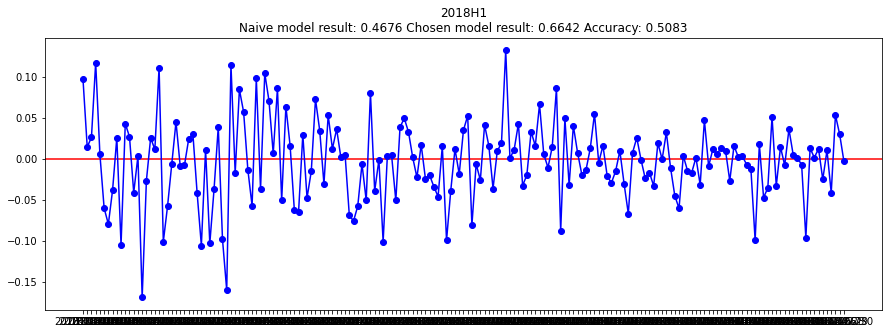

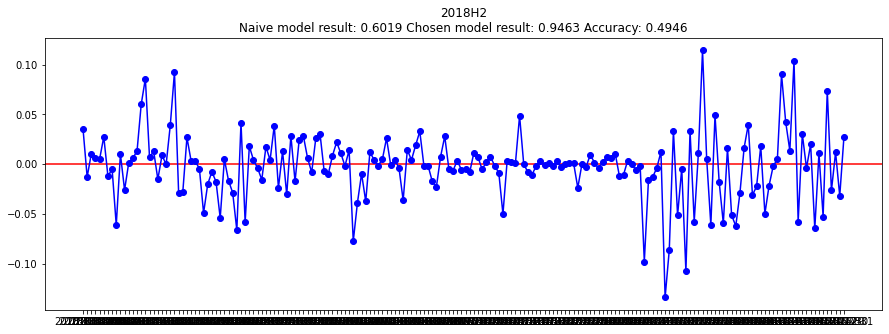

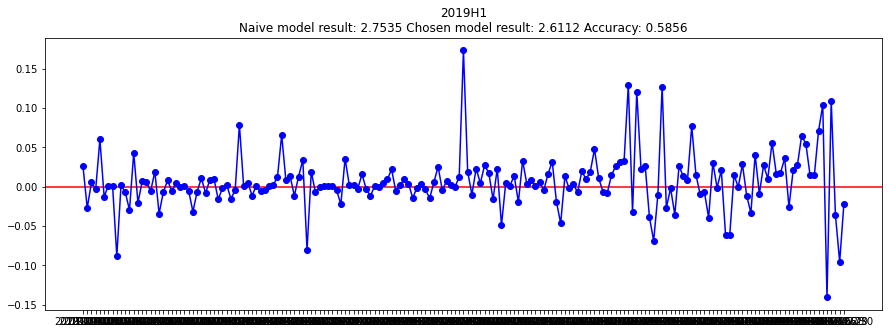

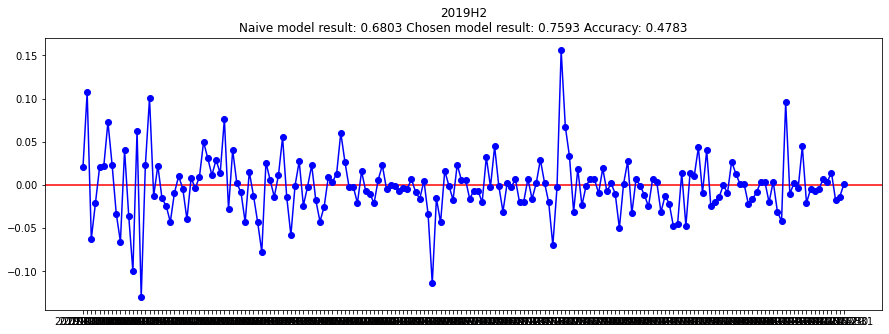

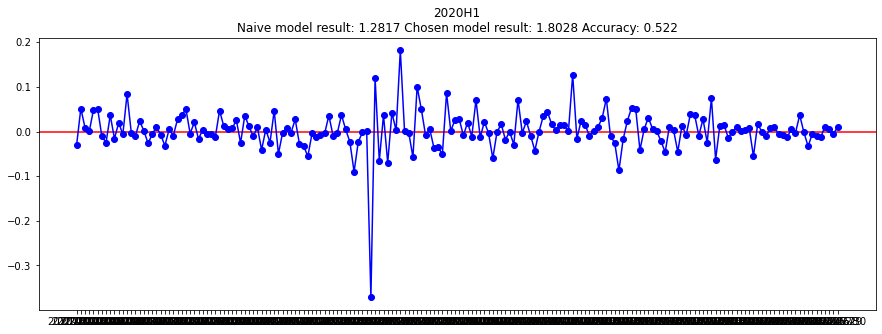

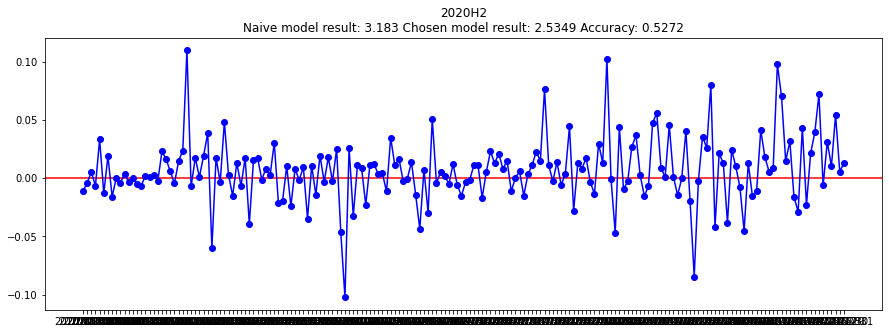

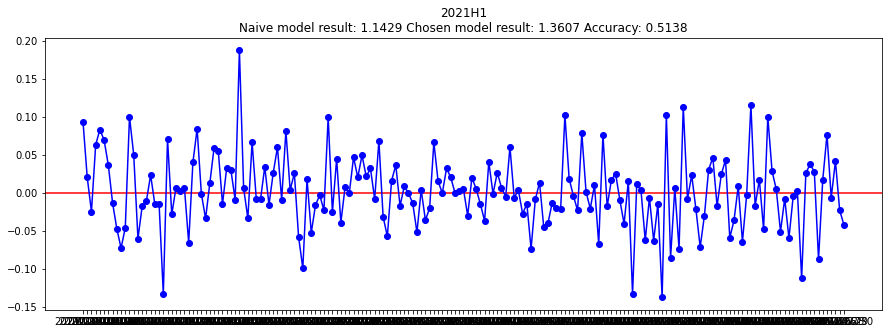

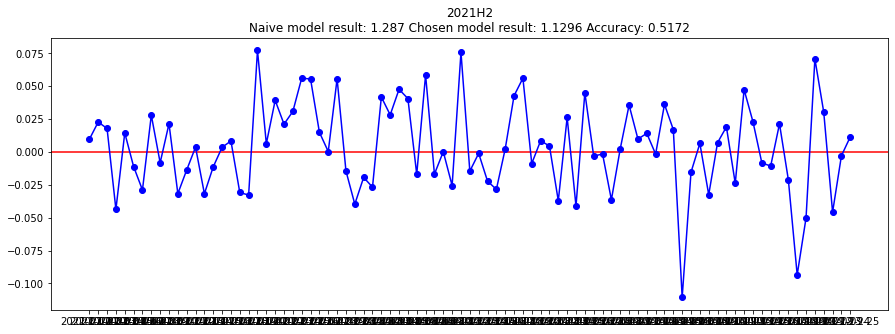

In [24]:
# Variables for storing the returns of the models (naive and actual model)
res_naive_acum=1
res_comis_acum=1

#We are executing half-year by half-year
for i in range(len(dates)-1):
    data_train=data_wfv[dates[0][0]:dates[i][1]].copy()
    data_cv=data_wfv[dates[i+1][0]:dates[i+1][1]].copy()
    
    if data_cv.size==0:
        break
    
    
    #I separate the variable I want to predict (if bitcoin price will go up or down the following day)
    X_train=data_train.drop(labels=['subida', 'varPSig'], axis=1)
    y_train=data_train['subida']
    real_train=data_train['varPSig']

    X_test=data_cv.drop(labels=['subida', 'varPSig'], axis=1)
    y_test=data_cv['subida']
    real_test=data_cv['varPSig']
    
    number_columns = X_train.select_dtypes('number').columns

    # as explained above, we only use PowerTransformer_yeo-johnson as column transformer
    transf=[
        ('scaler', PowerTransformer(method='yeo-johnson', standardize=False),number_columns)
        ]

    coltr=ColumnTransformer(transformers=transf, remainder='passthrough')

    
    conf_mat, f1, acc, res_naive, res_mod, res_comis = \
            walk_forward_validation (model, X_train, y_train, X_test, y_test, real_test, coltr)
    
    #we plot the variations in price for each day during each half-year
    plt.rcParams["figure.figsize"] = (15,5)
    plt.axhline(y=0.0, color='r', linestyle='-')
    plt.plot(real_test, marker='o', color='b')
    plt.title(str(dates[i+1][2]) + '\nNaive model result: ' + str(round(res_naive,4)) + \
              ' Chosen model result: ' + str(round(res_comis,4)) + \
             ' Accuracy: ' + str(round(acc,4)))
    
    plt.show()
    #print([dates[i+1][2], conf_mat, f1, acc, res_naive, res_comis])
        
    # Here we accumulate the results of the different half-years
    res_naive_acum=res_naive_acum*res_naive
    res_comis_acum=res_comis_acum*res_comis
    #print([res_naive_acum, res_comis_acum])

In [25]:
print('Naive model result from 2018: ' + str(res_naive_acum) + \
              '\nChosen model result from 2018: ' + str(res_comis_acum))

Naive model result from 2018: 3.1637918787204256
Chosen model result from 2018: 8.75329142701373


# Conclusion
The chosen model performs specially well during bear markets and loses to the market during bull runs (see 2020H2), but over an extended period of time it seems to be able to beat Bitcoin's performance.

An investor that had bought Bitcoin at the beginning of 2018 and held it until the september 2021 would have gotten a 216% return. The same investor following the presented model’s advice would have achieved a 775% return.